Title: Assignment: 8.1
Author: Sarah Yawn
Date: 20 July 2025
Modified By: Sarah Yawn
Description:
Data:
https://www.kaggle.com/datasets/pizzarules6681/wisconsin-weather

## Initial data cleaning

dropping the 'Unnamed: 0' column, which appears to be an index column from the CSV files, and handle missing values. Convert the 'time' column to datetime objects.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Define the path to the folder in your Google Drive
drive_folder_path = '/content/drive/MyDrive/Data'

# Load the datasets from Google Drive using the provided paths
try:
    df1 = pd.read_csv(f'{drive_folder_path}/2P2.csv')
    df2 = pd.read_csv(f'{drive_folder_path}/GRB.csv')
    df3 = pd.read_csv(f'{drive_folder_path}/ATW.csv')

    print("Datasets loaded successfully from Google Drive.")

    # Add a new column named 'Source' to each DataFrame
    df1['Source'] = '2P2'
    df2['Source'] = 'GRB'
    df3['Source'] = 'ATW'

    # Concatenate the three Dataframes into a single DataFrame
    df = pd.concat([df1, df2, df3], ignore_index=True)

    # Drop the 'Unnamed: 0' column
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])

    # Convert the 'time' column to datetime objects
    df['time'] = pd.to_datetime(df['time'])

    # Identify columns with all empty values
    empty_columns = df.columns[df.isnull().all()]
    # Drop the empty columns
    df = df.drop(columns=empty_columns)

    # Identify columns with missing values
    missing_values = df.isnull().sum()
    # Drop the empty columns
    missing_values_cols = missing_values[missing_values > 0].index.tolist()
    print(f"\nColumns with missing values before handling: {missing_values_cols}")

    # Handle missing values - Impute numerical columns with the median and categorical with the mode
    for col in missing_values_cols:
        if df[col].dtype in [np.float64, np.int64]:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"Imputed missing values in '{col}' with median ({median_val}).")
        else:
            # Handle potential multiple modes or empty series if all are NaN
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col] = df[col].fillna(mode_val[0])
                print(f"Imputed missing values in '{col}' with mode ({mode_val[0]}).")
            else:
                 # If mode is empty (all values were NaN), fill with a placeholder like 'Unknown' or ''
                df[col] = df[col].fillna('Unknown')
                print(f"Imputed missing values in '{col}' with 'Unknown' (no mode found).")

except FileNotFoundError:
    print(f"Error: One or more files not found in the specified Google Drive folder: {drive_folder_path}")
    print("Please ensure the folder path and filenames are correct and Drive is mounted.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive


/tmp/ipython-input-3372186252.py:15: DtypeWarning: Columns (16,21,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(f'{drive_folder_path}/GRB.csv')
/tmp/ipython-input-3372186252.py:16: DtypeWarning: Columns (16,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(f'{drive_folder_path}/ATW.csv')


Datasets loaded successfully from Google Drive.

Columns with missing values before handling: ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel', 'metar']
Imputed missing values in 'tmpf' with median (46.0).
Imputed missing values in 'dwpf' with median (35.6).
Imputed missing values in 'relh' with median (73.45).
Imputed missing values in 'drct' with median (210.0).
Imputed missing values in 'sknt' with median (8.0).
Imputed missing values in 'p01i' with median (0.0).
Imputed missing values in 'alti' with median (30.0).
Imputed missing values in 'mslp' with median (1016.4).
Imputed missing values in 'vsby' with median (10.0).
Imputed missing values in 'gust' with median (21.0).
Imputed missing values in 'skyc1' with mode (CLR).
Imputed missing values in

In [2]:
    # Display the first few rows and info of the cleaned DataFrame
    print("\nCleaned DataFrame Head:")
    display(df.head())
    print("\nCleaned DataFrame Info:")
    df.info()


Cleaned DataFrame Head:


,station,time,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,Source
0,2P2,2023-12-01 00:55:00,34.0,23.5,65.07,320.0,7.0,0.0,29.95,1016.4,...,BR,0.01,0.01,0.01,29.0,250.0,2004-10-16 18:30,27.22,K2P2 010655Z AUTO 32007KT 10SM CLR 01/M05 A299...,2P2
1,2P2,2023-12-01 01:55:00,32.7,25.5,74.52,330.0,7.0,0.0,29.95,1016.4,...,BR,0.01,0.01,0.01,29.0,250.0,2004-10-16 18:30,25.63,K2P2 010755Z AUTO 33007KT 10SM CLR 00/M04 A299...,2P2
2,2P2,2023-12-01 02:55:00,32.0,26.0,78.25,340.0,8.0,0.0,29.96,1016.4,...,BR,0.01,0.01,0.01,29.0,250.0,2004-10-16 18:30,24.11,K2P2 010855Z AUTO 34008KT 10SM CLR 00/M03 A299...,2P2
3,2P2,2023-12-01 03:55:00,31.5,24.8,75.96,350.0,7.0,0.0,29.97,1016.4,...,BR,0.01,0.01,0.01,29.0,250.0,2004-10-16 18:30,24.17,K2P2 010955Z AUTO 35007KT 10SM CLR 00/M04 A299...,2P2
4,2P2,2023-12-01 04:55:00,30.7,24.6,77.81,10.0,8.0,0.0,29.96,1016.4,...,BR,0.01,0.01,0.01,29.0,250.0,2004-10-16 18:30,22.51,K2P2 011055Z AUTO 01008KT 10SM CLR M01/M04 A29...,2P2



Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854646 entries, 0 to 854645
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   station            854646 non-null  object        
 1   time               854646 non-null  datetime64[ns]
 2   tmpf               854646 non-null  float64       
 3   dwpf               854646 non-null  float64       
 4   relh               854646 non-null  float64       
 5   drct               854646 non-null  float64       
 6   sknt               854646 non-null  float64       
 7   p01i               854646 non-null  float64       
 8   alti               854646 non-null  float64       
 9   mslp               854646 non-null  float64       
 10  vsby               854646 non-null  float64       
 11  gust               854646 non-null  float64       
 12  skyc1              854646 non-null  object        
 13  skyc2              

## Exploratory data analysis (eda)



In [3]:
# 1. Display descriptive statistics of the DataFrame, including all columns.
print("\n=== Descriptive Statistics (Including all columns) ===")
display(df.describe(include='all'))


=== Descriptive Statistics (Including all columns) ===


,station,time,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,Source
count,854646,854646,854646.000000,854646.000000,854646.000000,854646.000000,854646.000000,854646.000000,854646.000000,854646.000000,...,854646,854646.000000,854646.000000,854646.000000,854646.000000,854646.000000,854646,854646.000000,854646,854646
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,290,NaN,NaN,NaN,NaN,NaN,9603,NaN,851298,3
top,GRB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BR,NaN,NaN,NaN,NaN,NaN,2004-10-16 18:30,NaN,KATW 082345Z VRB05KT 5SM HZ SCT023 BKN100 M03/...,GRB
freq,590314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,748521,NaN,NaN,NaN,NaN,NaN,845043,NaN,3339,590314
mean,NaN,1992-11-22 01:03:56.289270784,45.716560,36.115676,71.584505,190.164573,8.371332,0.002290,29.995418,1016.379369,...,NaN,0.010015,0.010001,0.010004,29.013564,249.421070,NaN,41.590506,NaN,NaN
min,NaN,1949-09-01 07:00:00,-30.100000,-169.600000,0.000000,0.000000,0.000000,0.000000,2.950000,950.100000,...,NaN,0.010000,0.010000,0.010000,6.000000,10.000000,NaN,-57.030000,NaN,NaN
25%,NaN,1979-09-07 17:15:00,30.200000,23.000000,59.970000,90.000000,5.000000,0.000000,29.890000,1014.400000,...,NaN,0.010000,0.010000,0.010000,29.000000,250.000000,NaN,23.150000,NaN,NaN
50%,NaN,1995-02-24 08:00:00,46.000000,35.600000,73.450000,210.000000,8.000000,0.000000,30.000000,1016.400000,...,NaN,0.010000,0.010000,0.010000,29.000000,250.000000,NaN,42.330000,NaN,NaN
75%,NaN,2010-05-03 16:32:00,63.000000,52.000000,85.610000,270.000000,11.000000,0.000000,30.110000,1018.500000,...,NaN,0.010000,0.010000,0.010000,29.000000,250.000000,NaN,62.960000,NaN,NaN
max,NaN,2024-02-01 13:55:00,122.000000,95.000000,115.350000,360.000000,912.000000,2.840000,39.970000,1050.900000,...,NaN,9.430000,0.110000,0.390000,256.000000,360.000000,NaN,182.660000,NaN,NaN


In [4]:
# 2. Print the data types of each column to understand the variable types.
print("\n=== Data Types ===")
print(df.dtypes)


=== Data Types ===
station                      object
time                 datetime64[ns]
tmpf                        float64
dwpf                        float64
relh                        float64
drct                        float64
sknt                        float64
p01i                        float64
alti                        float64
mslp                        float64
vsby                        float64
gust                        float64
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                       float64
skyl2                       float64
skyl3                       float64
skyl4                       float64
wxcodes                      object
ice_accretion_1hr           float64
ice_accretion_3hr           float64
ice_accretion_6hr           float64
peak_wind_gust              float64
peak_wind_drct              float64
peak_wind_time               object
feel    

In [5]:
# 3. Identify and print the names of numerical and categorical columns.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\n=== Column Types ===")
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


=== Column Types ===
Numerical columns: ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct', 'feel']
Categorical columns: ['station', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'wxcodes', 'peak_wind_time', 'metar', 'Source']


#EDA Questions

##What types of variables are there in the dataset?

Variable names and meanings:
station: three or four character site identifier
valid: time of the observation (in local timezone, cdt/cst)
tmpf: Temperature in Fahrenheit, typically @ 2 meters
dwpf: Dew Point Temperature in Fahrenheit, typically @ 2 meters
relh: Relative Humidity in %
drct: Wind Direction in degrees from true north
sknt: Wind Speed in knots
p01i: One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.
alti: Pressure altimeter in inches
mslp: Sea Level Pressure in millibar
vsby: Visibility in miles
gust: Wind Gust in knots
skyc1: Sky Level 1 Coverage
skyc2: Sky Level 2 Coverage
skyc3: Sky Level 3 Coverage
skyc4: Sky Level 4 Coverage
skyl1: Sky Level 1 Altitude in feet
skyl2: Sky Level 2 Altitude in feet
skyl3: Sky Level 3 Altitude in feet
skyl4: Sky Level 4 Altitude in feet
wxcodes: Present Weather Codes (space seperated)
feel: Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit
ice_accretion_1hr: Ice Accretion over 1 Hour (inches)
ice_accretion_3hr: Ice Accretion over 3 Hours (inches)
ice_accretion_6hr: Ice Accretion over 6 Hours (inches)
peak_wind_gust: Peak Wind Gust (from PK WND METAR remark) (knots)
peak_wind_drct: Peak Wind Gust Direction (from PK WND METAR remark) (deg)
peak_wind_time: Peak Wind Gust Time (from PK WND METAR remark)
metar: unprocessed reported observation in METAR format

##What do their distributions look like?

Ignoring the graphs that are empty due to missing values, these distributions seem to follow a pretty rough bell curve excluding relh, drct, poli, vsby. Some sky distributions do not follow a solitary bell curve, but instead increase and decrease in a wave format, which seems consistant with local weather changes. Looking at these graphs, I could take a stab at some corelations, but I figure it is better to do real math to calculate that.

##Do you have missing values?
Yes, I have now handled all missing values by removing rows that were completely empty, and updating empty values with median or mode

##What are the relationships between the main features?
I believe that alti (atmospheric altimer) and gust (knots) have a corelation as well as the dwpf, tmpf, feel correlation outlined below. Additionally the skyc and skyl levels are interconected.

##How do the different pairs of features correlate with one another?

*These are the highest correlations:*
High correlation between dwpf and tmpf: 0.95
High correlation between feel and tmpf: 0.95
High correlation between feel and dwpf: 0.93

##Are there redundant features?

Removing these potentially redundant features:
{'feel', 'dwpf'}

After reading up on the value of dewpoints, specifically in regard to the humidity in the air, I believe it is important to maintaintmpf and dwpf, however 'feel' which coresponds to the wind chill may not have the same statistical baring and I will consider removing during testing.

##Do these correlations make sense?
dwpf is the dew point temperature in Fahrenheit  and tmpf is the temperature in Fahrenheit. After reading up on the relation between temperature, dew point, and the way we percieve temperature from the national wether service, I believe these corelations make sense. I have provided quotes from the source below.


"The dew point marks the temperature at which water vapor will turn into liquid water droplets. This process is called condensation. Condensation is what causes clouds to form, which can then lead to precipitation such as rain, snow, and hail. The dew point will always be the same or lower than the actual outside temperature.

The higher the dew point, the greater the amount of moisture in the air. This affects how "comfortable" it will feel outside. When your body gets too hot, it begins to perspire or sweat to cool itself off. If the perspiration is not able to evaporate, the body cannot regulate its temperature. Evaporation is a cooling process. When perspiration is evaporated off the body, it effectively reduces the body's temperature. When the atmospheric moisture content is high, the rate of evaporation from the body decreases. In other words, the human body feels warmer in humid conditions. The opposite is true when moisture decreases because the rate of perspiration increases. The body actually feels cooler in arid conditions."

"warm air can hold more moisture and therefore allow the dew point to rise, as demonstrated in the graphic below. This directly affects how "comfortable" it will feel outside. Many times, relative humidity can be misleading. For example, a temperature of 50°F and a dew point of 50°F will give you a relative humidity of 100%, but a temperature of 90°F and a dew point of 69°F produces a relative humidity of 50%. It would feel much more "humid" on the 90-degree day with 50% relative humidity than on the 50-degree day with a 100% relative humidity. This is because of the higher dew point."

National Weather Service. (n.d.). Dew point. National Oceanic and Atmospheric Administration. Retrieved 06-15-2025, from https://www.weather.gov/tbw/dewpoint#:~:text=The%20dew%20point%20marks%20the,feels%20warmer%20in%20humid%20conditions.

##What is the relationship between the features and the target?**
Assuming the target is the parcipitation in inches, the most clear relationship is with vsby (visibility) which makes sense, but changes in vsby does not precurse precipitation in the way I would need them to. What I would hope to eventually find a more close connection to would be dew point and sky coverage/altitude, and pressure altimer, which are known to be storm precursers, though I am having trouble finding a visualization that will prove a correlation.

##Have you confirmed or rejected your hypothesis?
Assuming my hypothesis to be something along the lines of " I will be able to predict rainfall due to the atmospheric indicators present in this datasheet" I am preasently unable to, however I feel this is primarily due to my own ignorance on what data to look at and more research may yeild better results.

##What do you know now that will inform the modeling strategy?
I am still not fully aare what a model like this needs to be fully effective, but doing in depth analysis on the correlation of different values was both helpful in understanding the values and also seeing how interconnected something as complex as the weather might be. I am presently of the belief that I may have to use many more datasets than originally planned to get a good grasp on how the sky values work together. I also need to get a more in depth understanding of the pressure altimer and how it works, to see if it will be the most important predictor in future models.



=== Histograms of Numerical Columns ===


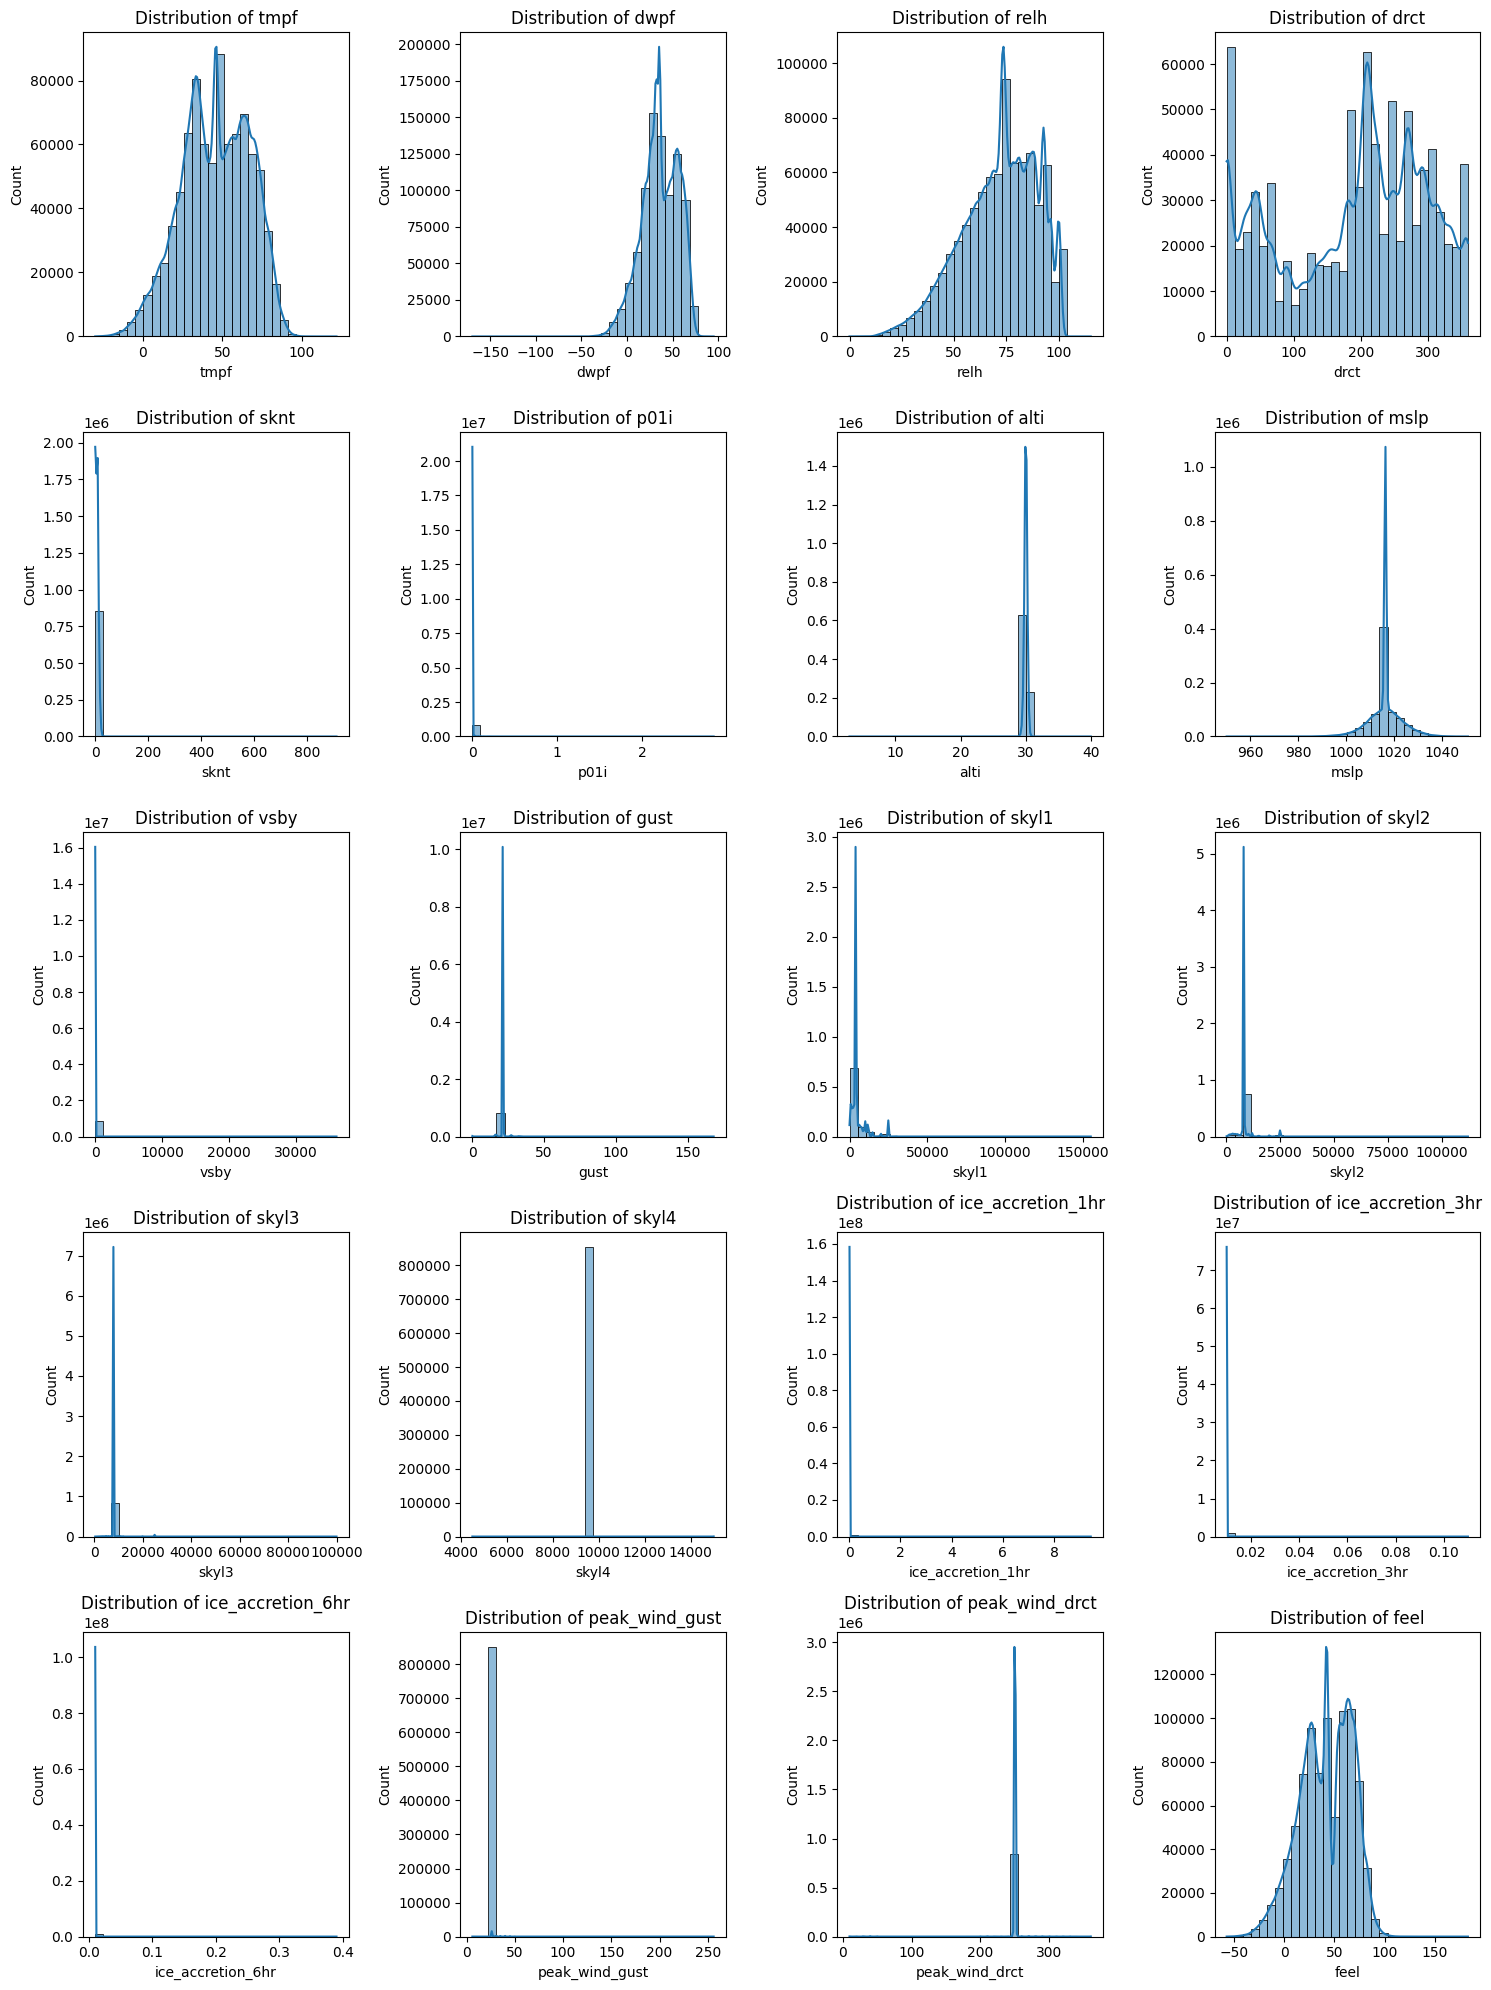

In [6]:
# 4. Generate histograms for all numerical columns
print("\n=== Histograms of Numerical Columns ===")
# Exclude 'snowdepth' as it contains only imputed values (0s)
numerical_cols_for_hist = [col for col in numerical_cols if col != 'snowdepth']

# Calculate the number of subplots needed
n_plots_num = len(numerical_cols_for_hist)

# Determine the grid size dynamically
n_cols_num = 4  # Number of columns per row in the subplot grid
n_rows_num = (n_plots_num + n_cols_num - 1) // n_cols_num # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows_num * 4))

for i, col in enumerate(numerical_cols_for_hist):
    plt.subplot(n_rows_num, n_cols_num, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


=== Count Plots of Categorical Columns ===


/tmp/ipython-input-2162367235.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis') # Use y for horizontal bars
/tmp/ipython-input-2162367235.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis') # Use y for horizontal bars
/tmp/ipython-input-2162367235.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis') # Use y for horizontal 

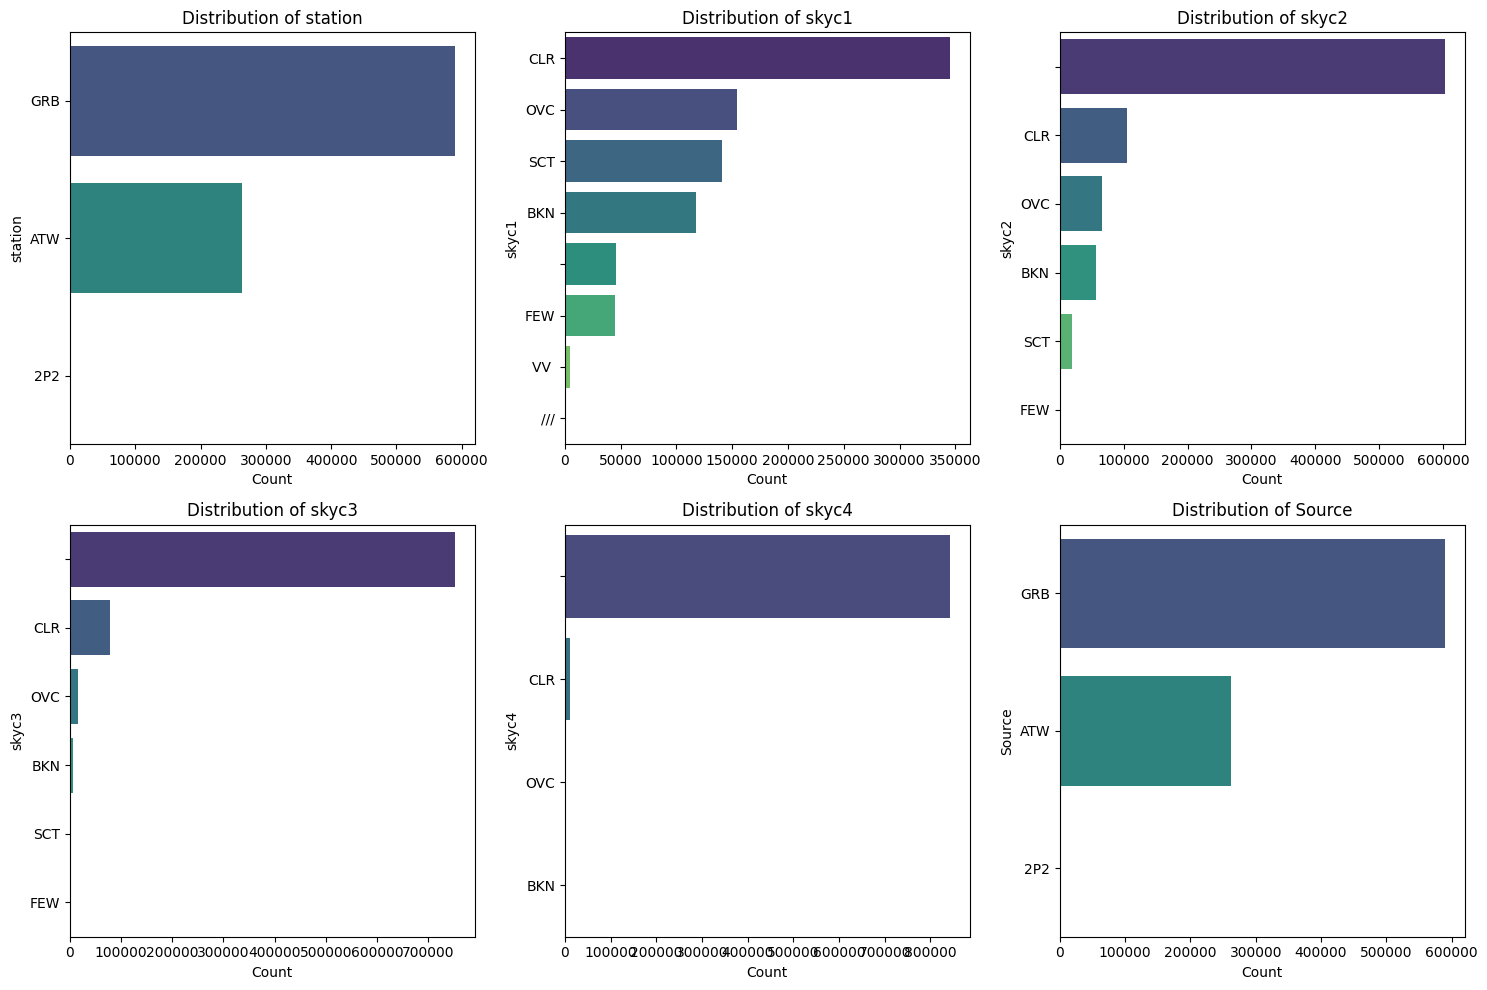

In [7]:
# 5. Create count plots or bar plots for categorical columns
print("\n=== Count Plots of Categorical Columns ===")

# Identify categorical columns with a reasonable number of unique values for plotting
# Define a threshold for the maximum number of unique values to plot
unique_threshold = 50

categorical_cols_for_plot = [col for col in categorical_cols if df[col].nunique() <= unique_threshold]

# Calculate the number of subplots needed
n_plots_cat = len(categorical_cols_for_plot)

# Determine the grid size dynamically
n_cols_cat = 3  # Number of columns per row in the subplot grid
n_rows_cat = (n_plots_cat + n_cols_cat - 1) // n_cols_cat # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows_cat * 5)) # Adjust figure height

for i, col in enumerate(categorical_cols_for_plot):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis') # Use y for horizontal bars
    plt.title(f'Distribution of {col}')
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()


In [8]:
# Print columns that were not plotted due to high cardinality
high_cardinality_cols = [col for col in categorical_cols if col not in categorical_cols_for_plot]
if high_cardinality_cols:
    print(f"\nCategorical columns not plotted due to high cardinality (>{unique_threshold} unique values): {high_cardinality_cols}")


Categorical columns not plotted due to high cardinality (>50 unique values): ['wxcodes', 'peak_wind_time', 'metar']


Calculate and display the correlation matrix for numerical features as a heatmap to understand their relationships and then summarize the findings from the EDA.



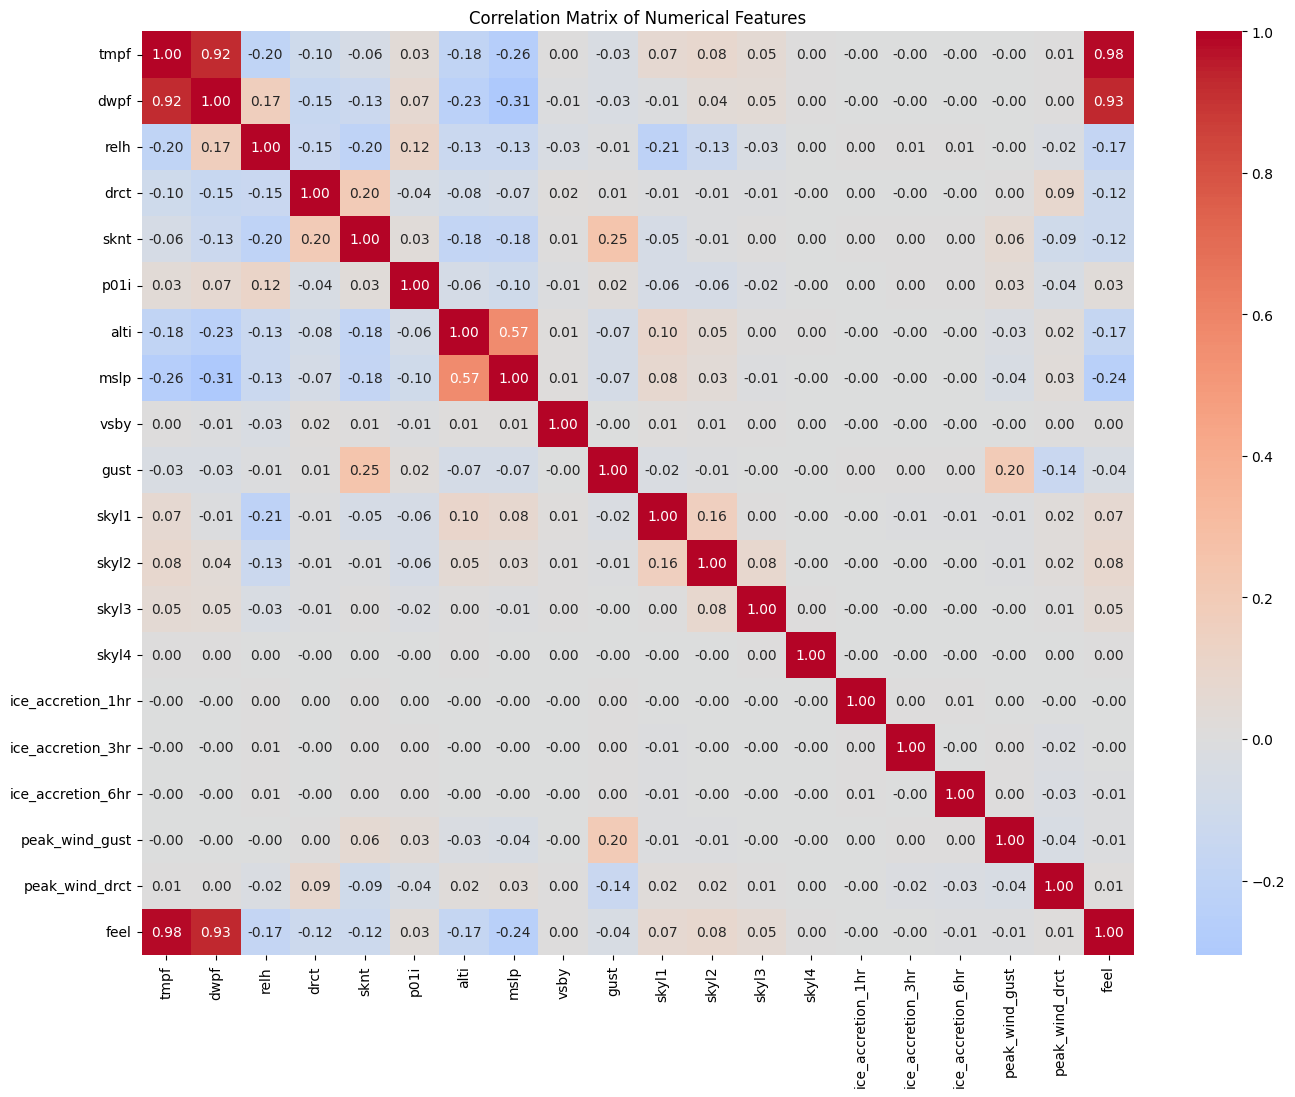

In [9]:
numerical_cols_for_corr = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'snowdepth' from correlation matrix as it is all 0s after imputation
if 'snowdepth' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('snowdepth')

corr_matrix = df[numerical_cols_for_corr].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [10]:
# Check for highly correlated features (threshold > 0.9)
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.9:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)
            print(f"High correlation between {corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i,j]:.2f}")

if high_corr:
    print("\nConsider removing these potentially redundant features:")
    print(high_corr)
else:
    print("\nNo highly correlated features found (above 0.9 threshold)")

High correlation between dwpf and tmpf: 0.92
High correlation between feel and tmpf: 0.98
High correlation between feel and dwpf: 0.93

Consider removing these potentially redundant features:
{'dwpf', 'feel'}


In [11]:
#save the current df to hist_df then create an updated df that removes 'feel', 'dwpf' , and 'mslp'

hist_df = df.copy()
df = df.drop(columns=['feel', 'mslp'])
print(df.head)

<bound method NDFrame.head of        station                time  tmpf  dwpf    relh   drct  sknt  p01i  \
0          2P2 2023-12-01 00:55:00  34.0  23.5   65.07  320.0   7.0   0.0   
1          2P2 2023-12-01 01:55:00  32.7  25.5   74.52  330.0   7.0   0.0   
2          2P2 2023-12-01 02:55:00  32.0  26.0   78.25  340.0   8.0   0.0   
3          2P2 2023-12-01 03:55:00  31.5  24.8   75.96  350.0   7.0   0.0   
4          2P2 2023-12-01 04:55:00  30.7  24.6   77.81   10.0   8.0   0.0   
...        ...                 ...   ...   ...     ...    ...   ...   ...   
854641     ATW 2024-02-01 09:45:00  35.6  35.6  100.00  330.0   3.0   0.0   
854642     ATW 2024-02-01 10:45:00  39.2  37.4   93.19  350.0   4.0   0.0   
854643     ATW 2024-02-01 11:45:00  42.8  37.4   81.07  360.0   6.0   0.0   
854644     ATW 2024-02-01 12:45:00  46.4  37.4   70.68  360.0   7.0   0.0   
854645     ATW 2024-02-01 13:45:00  48.2  35.6   61.52   30.0  10.0   0.0   

         alti   vsby  ...   skyl4 wxcodes ice

In [12]:
# convert dwpf and tmpf into a single catagory

def temperature_category(row):
    if pd.isnull(row['tmpf']) or pd.isnull(row['dwpf']):
        return 'Unknown'
    temp_diff = row['tmpf'] - row['dwpf']
    if temp_diff < 5:
        return 'HighHumidity_Warm' # Small difference indicates high humidity, combined with temp
    elif temp_diff >= 5 and row['tmpf'] > 60:
        return 'ModerateHumidity_Warm'
    elif temp_diff >= 5 and row['tmpf'] <= 60:
         return 'ModerateHumidity_Cool'
    elif temp_diff >= 15 and row['tmpf'] > 60:
        return 'LowHumidity_Warm'
    elif temp_diff >= 15 and row['tmpf'] <= 60:
         return 'LowHumidity_Cool'
    else:
        return 'Other' # Catch any edge cases

df['Temperature_Humidity_Category'] = df.apply(temperature_category, axis=1)

print("\nTemperature and Humidity Category counts:")
print(df['Temperature_Humidity_Category'].value_counts())

print("\nDataFrame with new category:")
print(df[['tmpf', 'dwpf', 'Temperature_Humidity_Category']].head())



Temperature and Humidity Category counts:
Temperature_Humidity_Category
ModerateHumidity_Cool    405152
HighHumidity_Warm        248100
ModerateHumidity_Warm    201394
Name: count, dtype: int64

DataFrame with new category:
   tmpf  dwpf Temperature_Humidity_Category
0  34.0  23.5         ModerateHumidity_Cool
1  32.7  25.5         ModerateHumidity_Cool
2  32.0  26.0         ModerateHumidity_Cool
3  31.5  24.8         ModerateHumidity_Cool
4  30.7  24.6         ModerateHumidity_Cool


=== EDA Summary ===


Key Findings:
- The dataset contains weather observations from three stations (2P2, GRB, ATW).
- The 'time' column is in datetime format, suitable for time-series analysis.
- Several columns (e.g., p01i, gust, sky levels, ice accretion, peak wind) had a significant number of missing values, which were imputed with median or mode.
- The 'snowdepth' column was entirely missing and was imputed with 0s, but remains uninformative.
- Numerical features like tmpf, dwpf, relh, drct, and sknt show varying distributions, some approximating a bell curve while others are skewed.
- Categorical features like 'station', 'skyc1', 'skyc2', 'skyc3', and 'skyc4' show the distribution of observations across different categories.
- 'wxcodes', 'peak_wind_time', and 'metar' have very high cardinality and were not suitable for standard count plots.
- The correlation matrix reveals relationships between numerical features. Notably, 'tmpf', 'dwpf', and 'feel' are highly correlated, suggesting potential redundancy.
- 'alti' and 'mslp' also show a very high correlation.
- Correlations with the target variable 'p01i' are generally low, with 'relh', 'dwpf', and 'peak_wind_gust' having the highest (though still weak) positive correlations.

Potential Issues/Observations for Further Investigation:
- The high correlation between 'tmpf', 'dwpf', and 'feel' and between 'alti' and 'mslp' suggests multicollinearity. Consider removing one of each pair.
- The low correlation of features with the target variable 'p01i' might indicate that predicting hourly precipitation directly from these features is challenging, or that more complex relationships exist.
- Features with a large number of imputed values (especially 'p01i', 'gust', sky levels, ice accretion, peak wind) should be treated with caution.
- The high cardinality of 'wxcodes', 'peak_wind_time', and 'metar' requires specific handling if they are to be used in modeling (e.g., feature engineering, dimensionality reduction, or exclusion).
- The skewed distributions of some numerical features (like p01i, gust, skyl levels) might require transformation before modeling, depending on the model used.

Based on this EDA, the next steps in feature engineering should focus on:
- Handling highly correlated numerical features.
- Addressing high-cardinality categorical features.
- Potentially transforming skewed numerical features.
- Exploring the relationships between features and the target 'p01i' in more detail.

## Feature engineering

#
Address high-cardinality categorical features by dropping irrelevant ones and encoding the remaining ones. Create new features from the 'time' column. Handle highly correlated numerical features and consider transforming skewed numerical features. Bin high importance features and otherwise normalize data for modelling


In [13]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Drop high cardinality columns
df = df.drop(columns=['metar', 'peak_wind_time'])
print("Dropped 'metar' and 'peak_wind_time' columns.")

Dropped 'metar' and 'peak_wind_time' columns.


In [14]:
# Extract relevant features from the 'time' column
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.dayofweek
print("Extracted year, month, day, hour, and dayofweek from 'time' column.")

# Drop the original 'time' column after extracting features
df = df.drop(columns=['time'])
print("Dropped original 'time' column.")

Extracted year, month, day, hour, and dayofweek from 'time' column.
Dropped original 'time' column.


In [15]:
# Define numerical columns based on the current dataframe df
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate correlations with 'p01i'
# Ensure 'p01i' is in the numerical columns before calculating correlation with it
if 'p01i' in num_cols:
    correlations = df[num_cols].corr()['p01i'].sort_values(ascending=False)

    # Get the top 5 correlated columns (excluding 'p01i' itself)
    # Ensure there are enough columns to get top 5 after dropping 'p01i'
    if len(correlations) > 1:
        top_5_corr_cols = correlations.drop('p01i').head(5).index.tolist()
        print(f"\nTop 5 columns most correlated with 'p01i': {top_5_corr_cols}")

        # Bin the top 5 correlated columns
        for col in top_5_corr_cols:
            # Check if the column is numeric before binning (should be as they are from num_cols)
            if pd.api.types.is_numeric_dtype(df[col]):
                # Define bin edges (adjust these based on the distribution of your data)
                # Using qcut to create bins with approximately equal number of samples
                try:
                    df[f'binned_{col}'] = pd.qcut(df[col], q=5, labels=['very low', 'low', 'med', 'high', 'very high'], duplicates='drop')
                except ValueError as e:
                    print(f"Could not bin column '{col}': {e}")
                    # Handle cases where there are not enough unique values for 5 bins
                    # Using pd.cut with auto bins for skewed data might be more robust here
                    try:
                        df[f'binned_{col}'] = pd.cut(df[col], bins=5, labels=['very low', 'low', 'med', 'high', 'very high'], include_lowest=True)
                    except ValueError as e_cut:
                         print(f"Could not bin column '{col}' with cut: {e_cut}")
                         df[f'binned_{col}'] = 'Binning Failed' # Assign a placeholder

                # Rename labels with column name prefix
                df[f'binned_{col}'] = df[f'binned_{col}'].apply(lambda x: f'{x}_{col}' if pd.notnull(x) and x != 'Binning Failed' else x)


        print("\nDataFrame with binned columns:")
        # Select only the original top 5 columns and their new binned columns for display
        display_cols = top_5_corr_cols + [f'binned_{col}' for col in top_5_corr_cols if f'binned_{col}' in df.columns]
        display(df[display_cols].head())

    else:
        print("\nNot enough numerical columns to determine top 5 correlations with 'p01i' (excluding 'p01i').")
else:
    print("\nTarget column 'p01i' not found in the numerical columns.")



Top 5 columns most correlated with 'p01i': ['relh', 'dwpf', 'peak_wind_gust', 'tmpf', 'sknt']
Could not bin column 'peak_wind_gust': Bin labels must be one fewer than the number of bin edges

DataFrame with binned columns:


,relh,dwpf,peak_wind_gust,tmpf,sknt,binned_relh,binned_dwpf,binned_peak_wind_gust,binned_tmpf,binned_sknt
0,65.07,23.5,29.0,34.0,7.0,low_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,low_sknt
1,74.52,25.5,29.0,32.7,7.0,med_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,low_sknt
2,78.25,26.0,29.0,32.0,8.0,high_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,med_sknt
3,75.96,24.8,29.0,31.5,7.0,med_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,low_sknt
4,77.81,24.6,29.0,30.7,8.0,med_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,med_sknt


In [16]:
# Identify and transform skewed numerical features
# Skewed columns identified in EDA: 'p01i', 'gust', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
# 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct'
skewed_cols = ['p01i', 'gust', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
               'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
               'peak_wind_gust', 'peak_wind_drct']

# Apply a power transformation (e.g., Yeo-Johnson or Box-Cox)
# Yeo-Johnson can handle zero and negative values, unlike Box-Cox.
pt = PowerTransformer(method='yeo-johnson')

for col in skewed_cols:
    if col in df.columns and df[col].dtype in [np.float64, np.int64]:
        # Reshape data for the transformer
        data_to_transform = df[col].values.reshape(-1, 1)
        # Fit and transform the data
        df[col] = pt.fit_transform(data_to_transform)
        print(f"Applied Yeo-Johnson transformation to '{col}'.")
    else:
        print(f"Column '{col}' not found or not numerical, skipping transformation.")


Applied Yeo-Johnson transformation to 'p01i'.
Applied Yeo-Johnson transformation to 'gust'.
Applied Yeo-Johnson transformation to 'skyl1'.
Applied Yeo-Johnson transformation to 'skyl2'.
Applied Yeo-Johnson transformation to 'skyl3'.
Applied Yeo-Johnson transformation to 'skyl4'.
Applied Yeo-Johnson transformation to 'ice_accretion_1hr'.
Applied Yeo-Johnson transformation to 'ice_accretion_3hr'.
Applied Yeo-Johnson transformation to 'ice_accretion_6hr'.
Applied Yeo-Johnson transformation to 'peak_wind_gust'.
Applied Yeo-Johnson transformation to 'peak_wind_drct'.


In [17]:
# Identify the remaining categorical columns and apply one-hot encoding
# Exclude the 'Source' column for now as per instruction
categorical_cols_to_encode = df.select_dtypes(include='object').columns.tolist()
if 'Source' in categorical_cols_to_encode:
    categorical_cols_to_encode.remove('Source')

print(f"\nCategorical columns to encode: {categorical_cols_to_encode}")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
print("Applied one-hot encoding to remaining categorical columns.")


Categorical columns to encode: ['station', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'wxcodes', 'Temperature_Humidity_Category']
Applied one-hot encoding to remaining categorical columns.


In [18]:
# Display the head and info of the DataFrame after feature engineering
print("\nDataFrame after Feature Engineering Head:")
display(df_encoded.head())
print("\nDataFrame after Feature Engineering Info:")
df_encoded.info()


DataFrame after Feature Engineering Head:


,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyl1,...,wxcodes_VCTS FU,wxcodes_VCTS FZRA,wxcodes_VCTS FZRA BR,wxcodes_VCTS HZ,wxcodes_VCTS RA,wxcodes_VCTS RA BR,wxcodes_VCTS RA BR FU,wxcodes_VCTSRA,Temperature_Humidity_Category_ModerateHumidity_Cool,Temperature_Humidity_Category_ModerateHumidity_Warm
0,34.0,23.5,65.07,320.0,7.0,-0.21162,29.95,10.0,-0.039185,-0.031237,...,False,False,False,False,False,False,False,False,True,False
1,32.7,25.5,74.52,330.0,7.0,-0.21162,29.95,10.0,-0.039185,-0.031237,...,False,False,False,False,False,False,False,False,True,False
2,32.0,26.0,78.25,340.0,8.0,-0.21162,29.96,10.0,-0.039185,-0.031237,...,False,False,False,False,False,False,False,False,True,False
3,31.5,24.8,75.96,350.0,7.0,-0.21162,29.97,10.0,-0.039185,-0.031237,...,False,False,False,False,False,False,False,False,True,False
4,30.7,24.6,77.81,10.0,8.0,-0.21162,29.96,10.0,-0.039185,-0.031237,...,False,False,False,False,False,False,False,False,True,False



DataFrame after Feature Engineering Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854646 entries, 0 to 854645
Columns: 342 entries, tmpf to Temperature_Humidity_Category_ModerateHumidity_Warm
dtypes: bool(313), category(5), float64(18), int32(5), object(1)
memory usage: 399.4+ MB


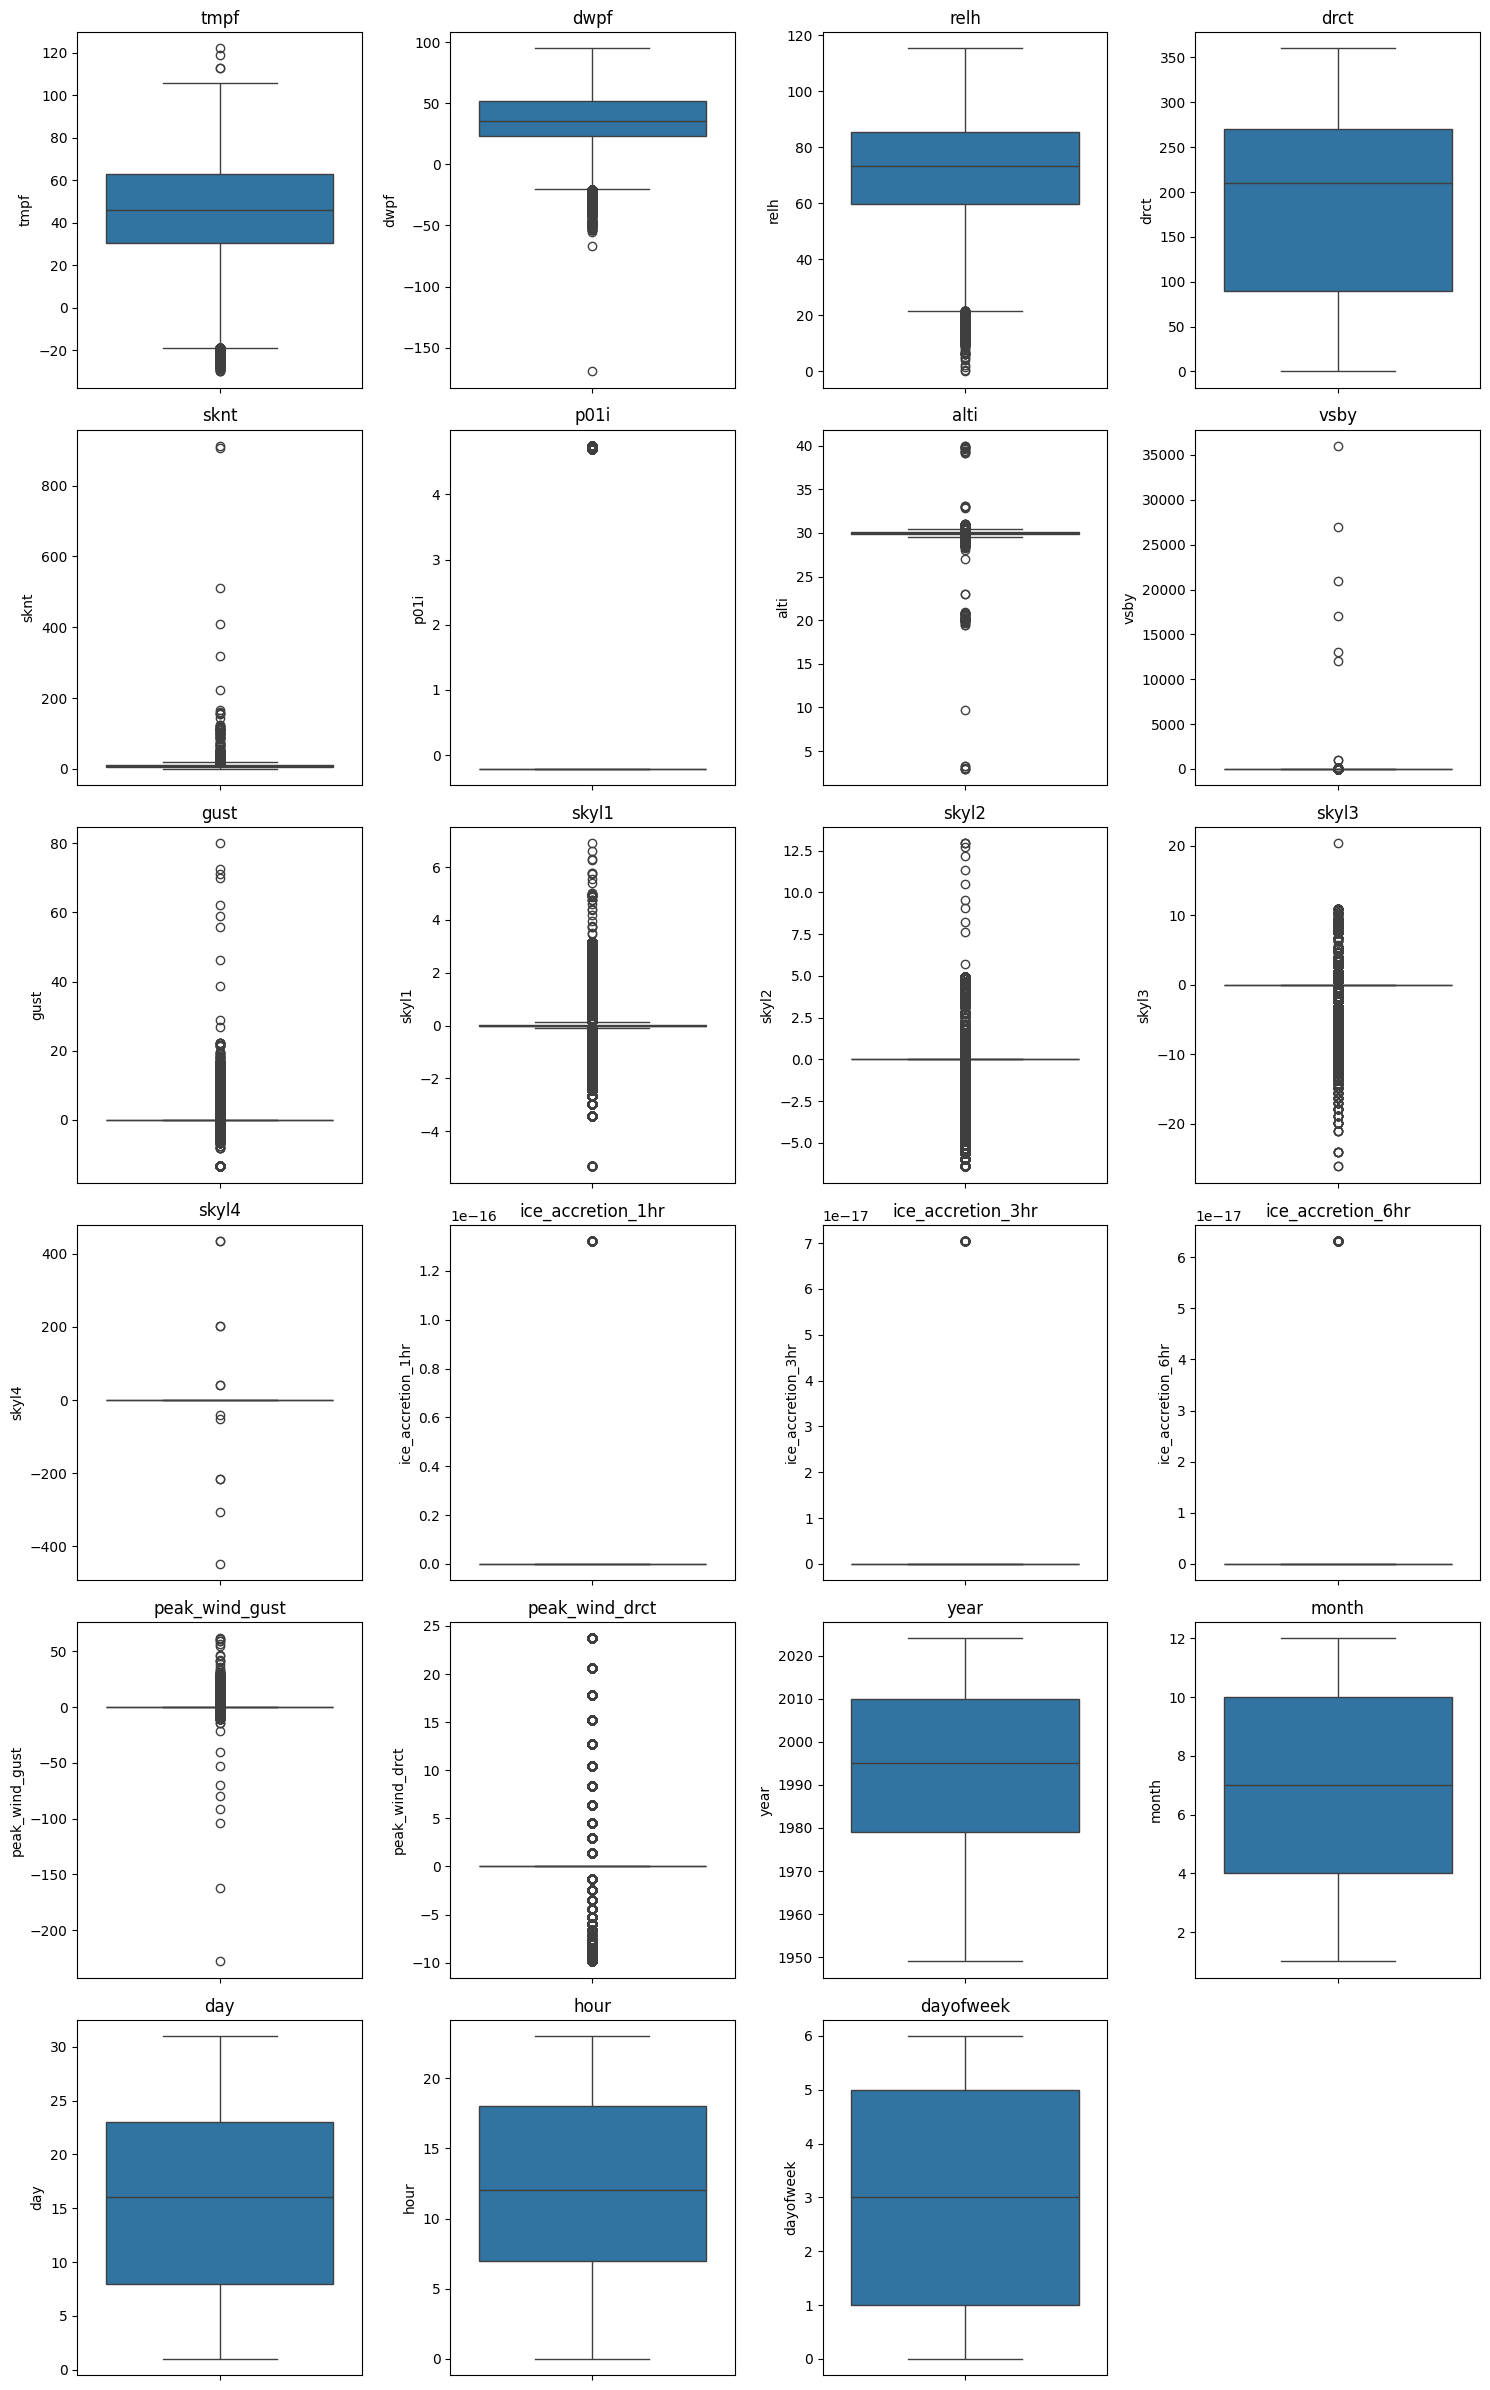


Potential outliers (Z-score > 3) per feature:
tmpf                   462
dwpf                  1659
relh                  2068
drct                     0
sknt                  3848
p01i                 36634
alti                  4317
vsby                     8
gust                 20906
skyl1                 3746
skyl2                41807
skyl3                13138
skyl4                   12
ice_accretion_1hr       91
ice_accretion_3hr       44
ice_accretion_6hr       82
peak_wind_gust        7454
peak_wind_drct        8384
year                     0
month                    0
day                      0
hour                     0
dayofweek                0
dtype: int64


In [19]:
# Import the stats module from scipy
from scipy import stats

# Boxplots for numerical features
# Filter out numerical columns that are all NaN before plotting - already handled by fillna(0)
# Now select only numerical columns for plotting
num_cols_for_plotting = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of subplots needed
n_plots = len(num_cols_for_plotting)

# Determine the grid size dynamically
n_cols = 4  # Number of columns per row in the subplot grid, adjust as needed
n_rows = (n_plots + n_cols - 1) // n_cols # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows * 4)) # Adjust figure size based on the number of rows

for i, col in enumerate(num_cols_for_plotting):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# Select only numerical columns for Z-score calculation
df_for_zscore = df.select_dtypes(include=[np.number])

# Ensure the DataFrame is not empty after selection
if not df_for_zscore.empty:
    # Calculate Z-scores, handling potential inf values if any were introduced (unlikely with fillna(0))
    z_scores = stats.zscore(df_for_zscore.replace([np.inf, -np.inf], np.nan).dropna())
    abs_z_scores = np.abs(z_scores)

    # Create a pandas Series with the correct column names
    outliers = pd.Series((abs_z_scores > 3).sum(axis=0), index=df_for_zscore.columns)
    print("\nPotential outliers (Z-score > 3) per feature:")
    print(outliers)
else:
    print("\nNo numerical data available for Z-score calculation after selection.")


=== Feature-Target Relationships ===


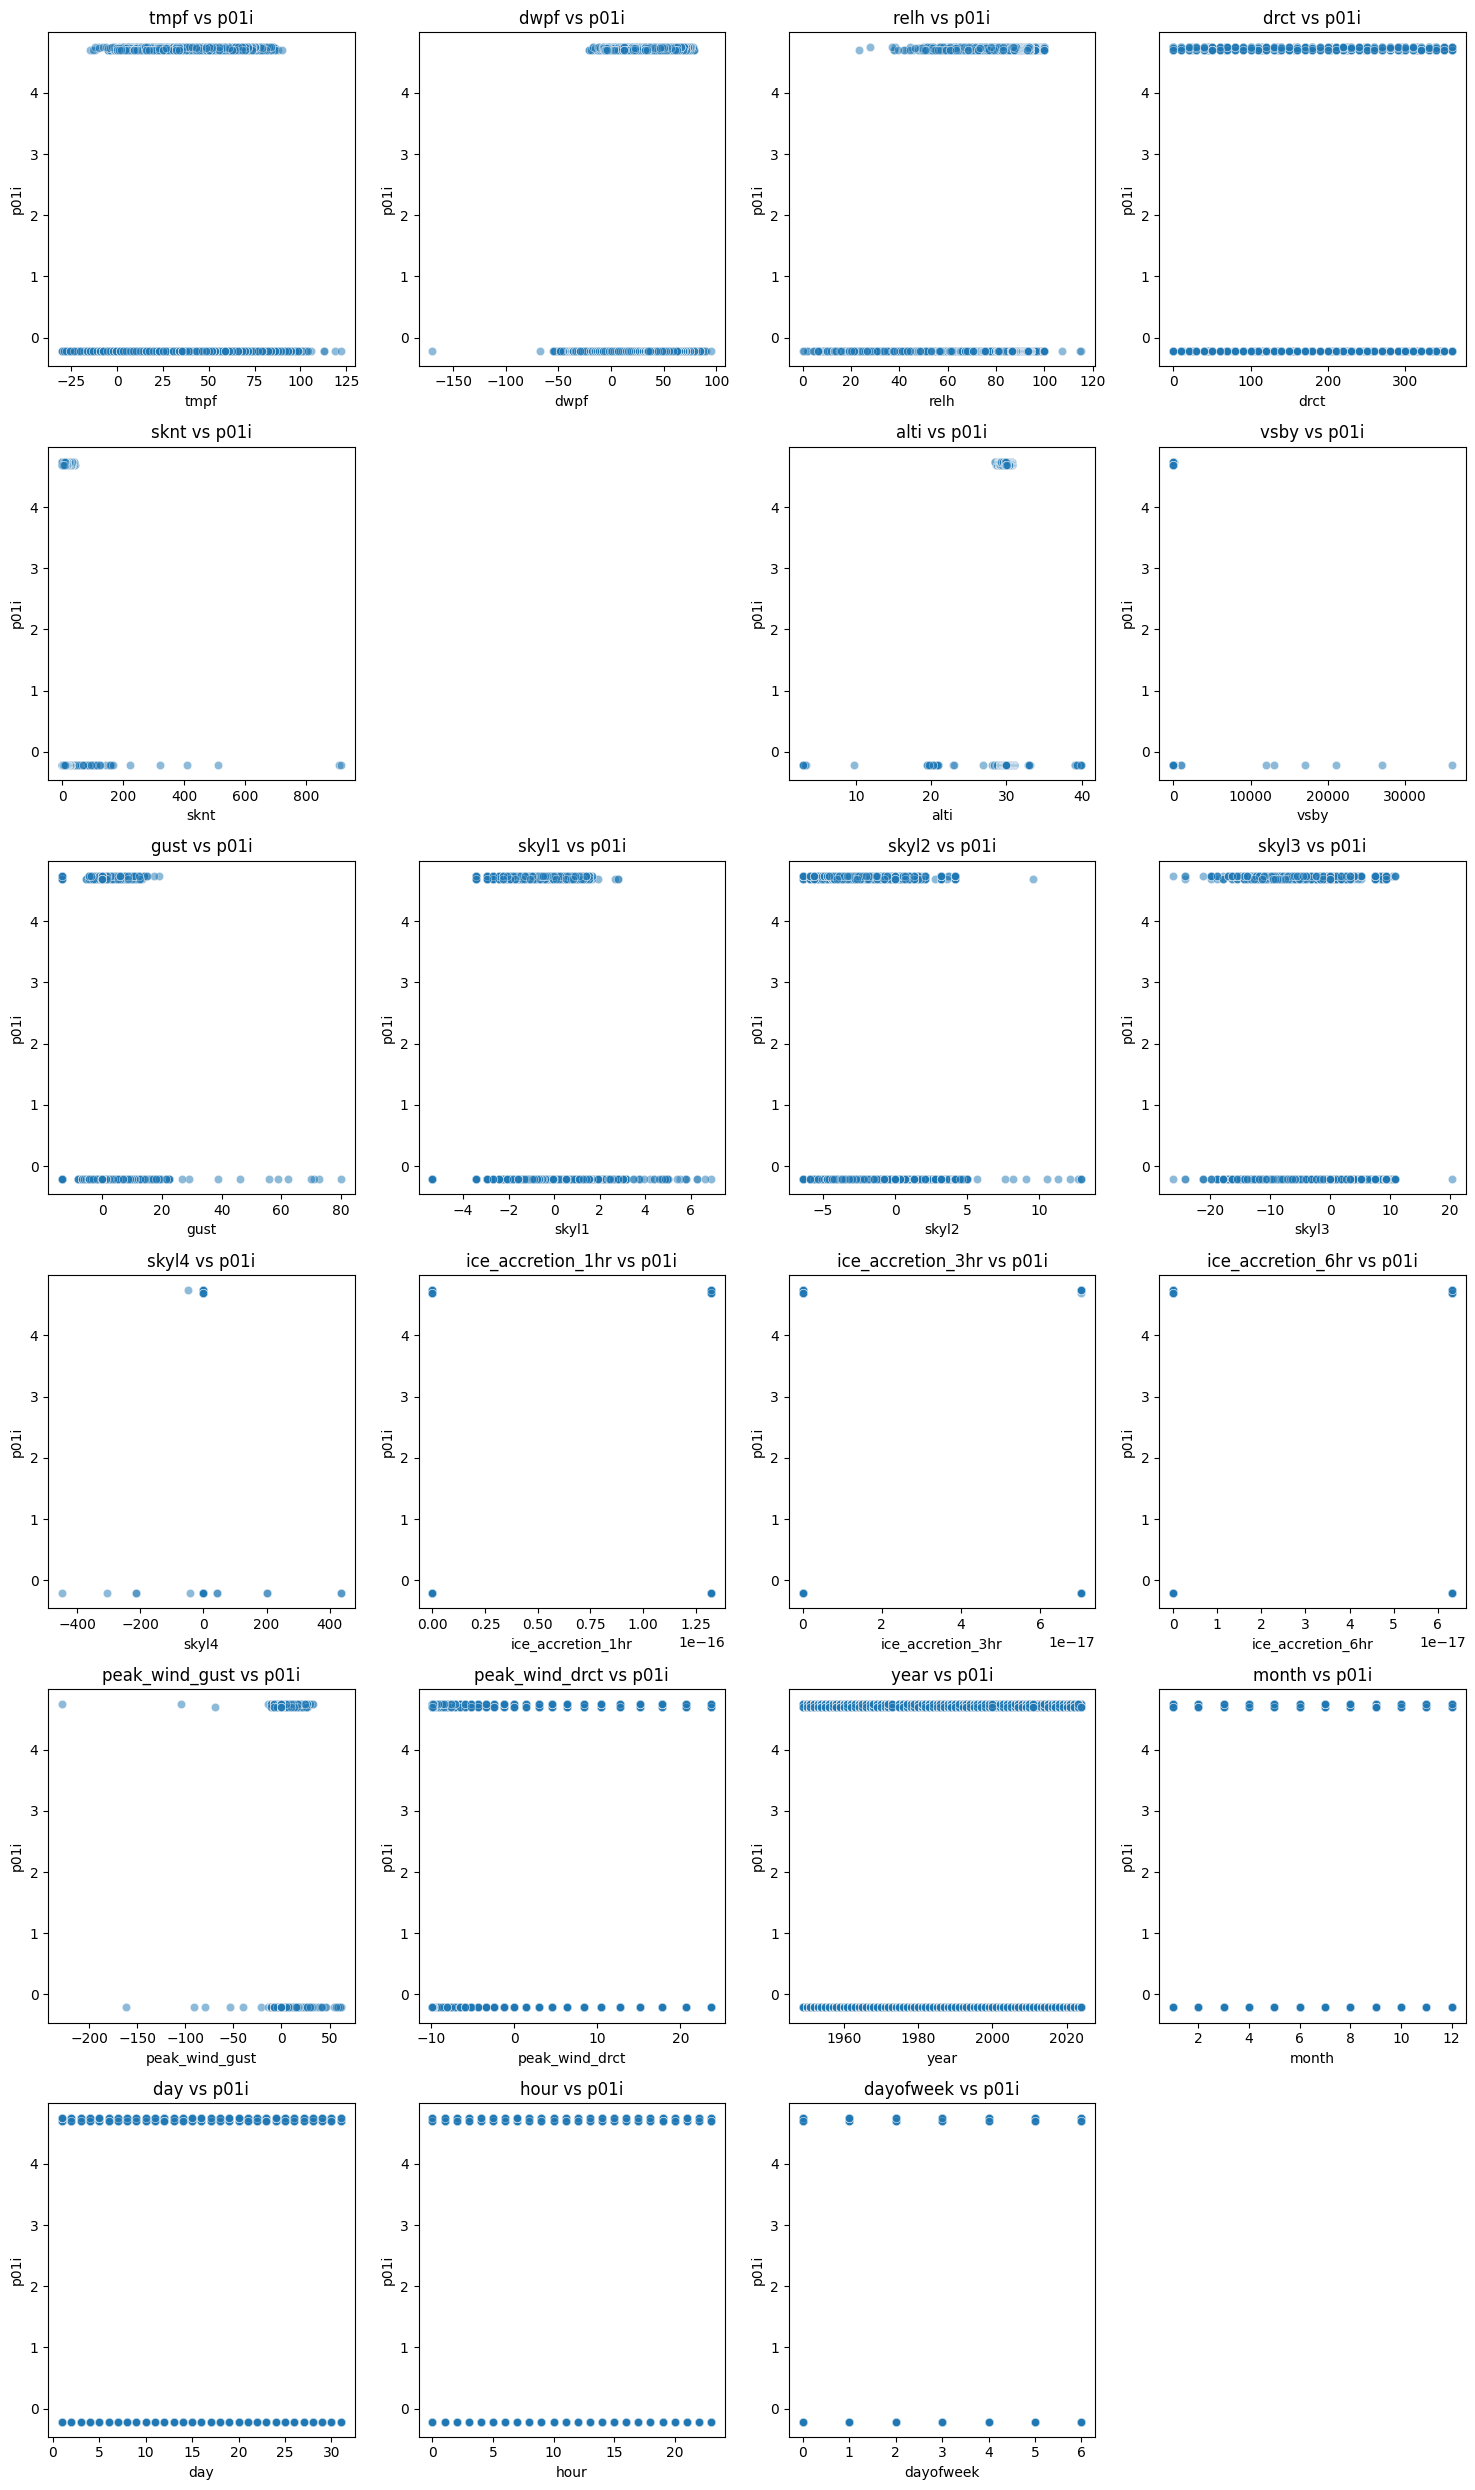


Correlation with target (p01i):
p01i                 1.000000
relh                 0.226713
dwpf                 0.058532
sknt                 0.056231
gust                 0.031674
peak_wind_gust       0.024719
ice_accretion_1hr    0.019105
ice_accretion_6hr    0.016792
ice_accretion_3hr    0.007360
day                  0.005865
dayofweek            0.000381
skyl4               -0.000312
month               -0.001911
tmpf                -0.014050
vsby                -0.020552
hour                -0.024808
peak_wind_drct      -0.035116
year                -0.042864
drct                -0.076871
skyl3               -0.077079
alti                -0.121169
skyl2               -0.142141
skyl1               -0.185145
Name: p01i, dtype: float64


In [20]:
# Assuming 'p01i' is the target variable (the parcipitation over the hour period that each row corresponds to)
target = 'p01i'
if target in df.columns:
    print("\n=== Feature-Target Relationships ===")

    # Numerical features vs target
    plt.figure(figsize=(15,25)) # Increased figure height to accommodate more rows
    # Adjusted subplot grid to 6 rows and 4 columns
    for i, col in enumerate(num_cols):
        if col != target:
            # Check if the current index 'i' would exceed the number of available subplots
            # A 6x4 grid has 24 plots. We have 24 numerical columns.
            # If we want to plot all numerical columns except the target, we need 23 plots.
            # A 6x4 grid is the closest without skipping columns or making a much larger grid.
            # Let's stick to a 6x4 grid and make sure we don't exceed the index 24.
            if i < 24: # Ensure we don't try to plot more than 24 subplots
                plt.subplot(6,4,i+1) # Changed grid to 6 rows, 4 columns
                sns.scatterplot(data=df, x=col, y=target, alpha=0.5)
                plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()

    # Correlation with target
    target_corr = df[num_cols].corr()[target].sort_values(ascending=False)
    print(f"\nCorrelation with target ({target}):")
    print(target_corr)
else:
    print(f"\nTarget column '{target}' not found in dataset")


In [21]:
# Additional time series analysis
if 'datetime' in df.columns:
    print("\n=== Time Series Analysis ===")

    # Plot target over time
    if target in df.columns:
        plt.figure(figsize=(15,5))
        df.set_index('datetime')[target].plot()
        plt.title(f'{target} over time')
        plt.ylabel(target)
        plt.show()

    from statsmodels.tsa.seasonal import seasonal_decompose

    # Ensure datetime is the index and no missing values
    ts_df = df.set_index('datetime')[target].interpolate()
    decomposition = seasonal_decompose(ts_df.dropna(), period=24)  # Daily seasonality assuming hourly data
    decomposition.plot()
    plt.tight_layout()
    plt.show()

## Outlier removal

Based on the boxplots and Z-score analysis from the previous EDA steps, I will identify columns with significant outliers and remove rows exceeding a Z-score threshold of 3 in those columns. I will then display the impact of the removal. I am applying the outlier removal due to the higher than expected RMSE, however, notably, this does not better the RMSE by a large amount in the current itteration, still, every little bit helps.

From the previous Z-score output, 'sknt', 'gust', 'peak_wind_gust', and the 'ice_accretion' columns show high outlier counts.

'p01i' also has outliers, but it is the target variable, and removing rows based on target outliers might not be appropriate

In [22]:
from scipy.stats import zscore

# Identify numerical columns with potential egregious outliers based on visual inspection and Z-score counts

outlier_cols = ['sknt', 'gust', 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust']

# Calculate Z-scores for the selected outlier columns
z_scores_outlier_cols = df[outlier_cols].apply(zscore)

# Define the Z-score threshold
z_score_threshold = 3

# Identify rows where the absolute Z-score for any of the selected columns exceeds the threshold
outlier_rows = (np.abs(z_scores_outlier_cols) > z_score_threshold).any(axis=1)

# Get the number of rows before outlier removal
initial_rows = df.shape[0]

# Remove the identified outlier rows from the DataFrame
df_no_outliers = df[~outlier_rows].copy()

# Get the number of rows after outlier removal
rows_after_removal = df_no_outliers.shape[0]

# Print the number of rows removed
rows_removed = initial_rows - rows_after_removal
print(f"\nNumber of rows removed due to egregious outliers (Z-score > {z_score_threshold}): {rows_removed}")
print(f"Percentage of rows removed: {(rows_removed / initial_rows) * 100:.2f}%")


# Display the head and shape of the DataFrame after outlier removal
print("\nDataFrame after outlier removal Head:")
display(df_no_outliers.head())
print("\nDataFrame after outlier removal Shape:")
print(df_no_outliers.shape)

# Update the main dataframe 'df' to reflect the outlier removal for subsequent steps
df = df_no_outliers


Number of rows removed due to egregious outliers (Z-score > 3): 27064
Percentage of rows removed: 3.17%

DataFrame after outlier removal Head:


,station,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,...,year,month,day,hour,dayofweek,binned_relh,binned_dwpf,binned_peak_wind_gust,binned_tmpf,binned_sknt
0,2P2,34.0,23.5,65.07,320.0,7.0,-0.21162,29.95,10.0,-0.039185,...,2023,12,1,0,4,low_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,low_sknt
1,2P2,32.7,25.5,74.52,330.0,7.0,-0.21162,29.95,10.0,-0.039185,...,2023,12,1,1,4,med_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,low_sknt
2,2P2,32.0,26.0,78.25,340.0,8.0,-0.21162,29.96,10.0,-0.039185,...,2023,12,1,2,4,high_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,med_sknt
3,2P2,31.5,24.8,75.96,350.0,7.0,-0.21162,29.97,10.0,-0.039185,...,2023,12,1,3,4,med_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,low_sknt
4,2P2,30.7,24.6,77.81,10.0,8.0,-0.21162,29.96,10.0,-0.039185,...,2023,12,1,4,4,med_relh,low_dwpf,very low_peak_wind_gust,low_tmpf,med_sknt



DataFrame after outlier removal Shape:
(827582, 36)


## Data splitting

I will now split the `df_no_outliers` dataframe into training and testing sets, defining the features `X` and the target `y` as per the instructions. This will prepare the data for the model training phase.



In [23]:
from sklearn.model_selection import train_test_split

# 1. Define features (X) by dropping the target and non-numeric columns
X = df_no_outliers.drop(columns=['p01i', 'Source', 'station', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'wxcodes', 'Temperature_Humidity_Category'])

# 2. Define the target variable (y)
y = df_no_outliers['p01i']

# 3. Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Print the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (662065, 27)
Shape of X_test: (165517, 27)
Shape of y_train: (662065,)
Shape of y_test: (165517,)


## Model selection and initial training

Train and evaluate several different regression models (e.g., Random Forest, Gradient Boosting, Linear Models) on the training data using cross-validation to get an initial performance estimate for each.


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a list of model instances to evaluate
models = []
models.append(('LinearRegression', LinearRegression()))
# Using reasonable initial parameters for Gradient Boosting
models.append(('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)))
# Using reasonable initial parameters for Random Forest (fewer estimators for quicker evaluation)
models.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)))


# Keep track of the best model and its performance
best_model_name = None
best_mse_score = float('inf')
best_model_instance = None

# Loop through the list of models
for name, model in models:
    print(f"\nEvaluating {name}...")

    # Use cross_val_score to perform cross-validation
    # Using cv=3 and scoring='neg_mean_squared_error'
    # Handle potential errors during cross-validation
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

        # Calculate the mean of the cross-validation scores and convert to positive MSE
        avg_mse = -cv_scores.mean()

        # 4. Print the average cross-validation MSE
        print(f"Average Cross-Validation MSE for {name}: {avg_mse:.4f}")

        # 5. Keep track of the model with the lowest average cross-validation MSE
        if avg_mse < best_mse_score:
            best_mse_score = avg_mse
            best_model_name = name
            best_model_instance = model # Store the instance for later use

    except Exception as e:
        print(f"An error occurred during cross-validation for {name}: {e}")
        # Continue to the next model if an error occurs

print(f"\nBest performing model based on average cross-validation MSE: {best_model_name} with MSE: {best_mse_score:.4f}")


Evaluating LinearRegression...
An error occurred during cross-validation for LinearRegression: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 622, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
                                        ^^^^^^^^^^^^^^^

**Tune the Model
Tune the hyperparameters of the chosen best model (Random Forest Regressor) using RandomizedSearchCV to optimize performance.



In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Identify non-numeric columns in X_train again in case they were re-added
non_numeric_cols_train = X_train.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols_train) > 0:
    X_train = X_train.drop(columns=non_numeric_cols_train)
    print(f"Dropped non-numeric columns from X_train before tuning: {non_numeric_cols_train.tolist()}")

non_numeric_cols_test = X_test.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols_test) > 0:
    X_test = X_test.drop(columns=non_numeric_cols_test)
    print(f"Dropped non-numeric columns from X_test before tuning: {non_numeric_cols_test.tolist()}")


# Define a parameter distribution for RandomizedSearchCV
# Using a smaller distribution and fewer iterations due to the dataset size and computational cost
param_distributions = {
    'n_estimators': [50, 100, 150], # Fewer estimators to start
    'max_depth': [10, 20, None], # Explore shallower and full depth trees
    'min_samples_split': [2, 5], # Smaller values to capture more detail
    'min_samples_leaf': [1, 2], # Smaller values
    'bootstrap': [True, False]
}

# Instantiate the RandomForestRegressor model
# Use n_jobs=-1 to utilize all available processor cores
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Instantiate RandomizedSearchCV
# Using n_iter=10 for a quicker search
# Using cv=3 for 3-fold cross-validation
# Scoring with 'neg_mean_squared_error' to optimize for lower MSE
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=10, scoring='neg_mean_squared_error',
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search object to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found by the search
print("\nBest parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Print the best score found by the search (which is the negative MSE)
# Convert negative MSE to positive MSE for interpretation
best_mse = -random_search.best_score_
print(f"\nBest cross-validation MSE: {best_mse}")

# Instantiate a new model with the best parameters
best_rf_model = RandomForestRegressor(**random_search.best_params_, random_state=42, n_jobs=-1)
# Train the new model with the best parameters on the entire training set
best_rf_model.fit(X_train, y_train)

print("\nRandom Forest Regressor model trained with best parameters successfully.")

Dropped non-numeric columns from X_train before tuning: ['binned_relh', 'binned_dwpf', 'binned_peak_wind_gust', 'binned_tmpf', 'binned_sknt']
Dropped non-numeric columns from X_test before tuning: ['binned_relh', 'binned_dwpf', 'binned_peak_wind_gust', 'binned_tmpf', 'binned_sknt']
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters found by RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}

Best cross-validation MSE: 0.628453679060291

Random Forest Regressor model trained with best parameters successfully.


## Model Evaluation
I will now evaluate the performance of the tuned model, `best_rf_model`, on the test set. I will generate predictions, calculate the Mean Squared Error (MSE) and R-squared (R2) score, and compare these metrics to the initial model's performance. Finally, I will create a scatter plot and residual plots to visually inspect the relationship between the actual and predicted values from the tuned model and the model's error distribution.



Tuned Model Mean Squared Error (MSE): 0.598460429769067
Tuned Model R-squared (R2) Score: 0.3820346966592686


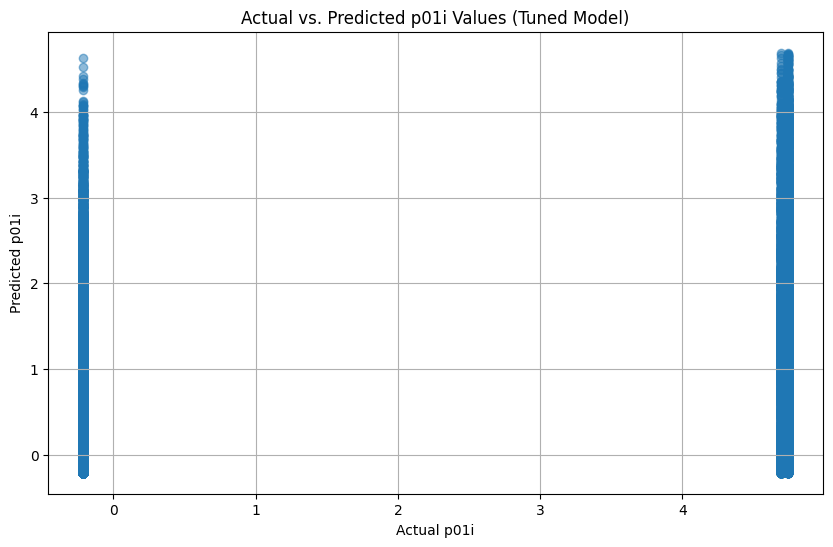

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Use the trained model `best_rf_model` to make predictions on the test data `X_test`
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Model Mean Squared Error (MSE): {mse_tuned}")

# Calculate the R-squared (R2) score
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned Model R-squared (R2) Score: {r2_tuned}")

# Create a scatter plot to visualize the relationship between the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)


plt.title('Actual vs. Predicted p01i Values (Tuned Model)')
plt.xlabel('Actual p01i')
plt.ylabel('Predicted p01i')
plt.grid(True)
plt.show()

There are two distinct vertical clusters of data points - one at approximately x=0 and another at around x=4.5 on the "Actual p01i" axis. This seems like the actuak p01i is nit nearly as evenly distributed as the predicted values.

For each cluster of actual values, the predicted values span a wide range (roughly from 0 to over 4), indicating poor correlation between predictions and actual values.

In an effective predictive model, we would expect to see points clustered along a diagonal line (y=x), representing accurate predictions. This pattern is notably absent.

The data appears to have a binary or bimodal distribution in the actual values (concentrated at 0 and 4.5), but the model is producing continuous predictions across the entire range.

The model is failing to distinguish between the two classes of actual values, as evidenced by the overlapping ranges of predictions for both clusters.

The nature of the data (appearing almost binary) suggests that perhaps a classification approach might be more appropriate than a regression model. Despite my research implying random forest should be the best to do weather analysis.

This plot, combined with the previous residual plot, strongly indicates that despite tuning efforts, the current model is not effectively capturing the underlying structure of the data.

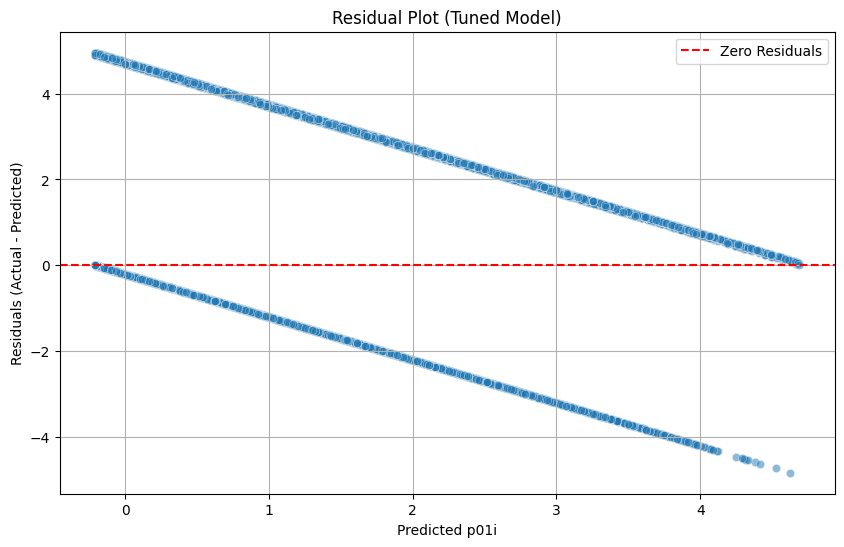

In [27]:
#Calculate the residuals (the difference between `y_test` and `y_pred_tuned`).
residuals = y_test - y_pred_tuned

# Create a scatter plot of the residuals against the predicted values (`y_pred_tuned`).
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_tuned, y=residuals, alpha=0.5)

# Add a horizontal dashed red line at y=0 to the residual plot to indicate zero residuals.
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')

# Add titles and labels to the residual plot ('Residual Plot (Tuned Model)', 'Predicted p01i', 'Residuals (Actual - Predicted)').
plt.title('Residual Plot (Tuned Model)')
plt.xlabel('Predicted p01i')
plt.ylabel('Residuals (Actual - Predicted)')


plt.legend()
plt.grid(True)
plt.show()

The plot shows two distinct diagonal lines of residuals trending downward from left to right, rather than the random scatter that would indicate a well-fitted model.

Parallel Structures: The presence of two parallel diagonal lines indicates a systematic relationship between predicted values and errors, which violates a fundamental assumption of regression modeling that residuals should be randomly distributed.

The residuals range from approximately -5 to +5, which may be substantial depending on the scale of the target variable.

The clear negative slope in both lines indicates that as predicted values increase, the model systematically underestimates the actual values.

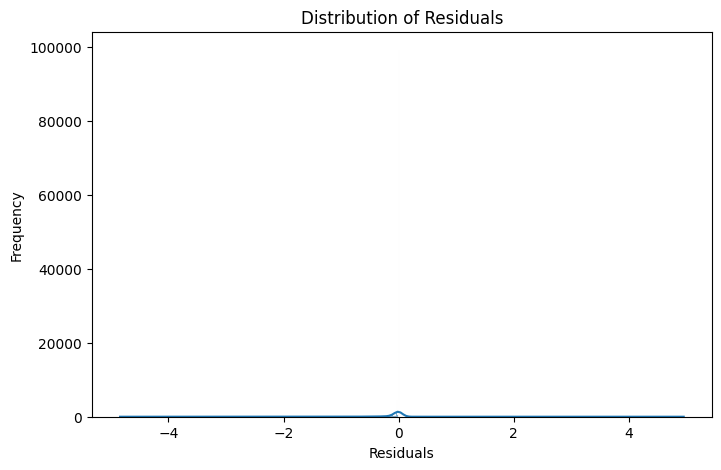

In [28]:
# Create a histogram of the residuals to check for normality.
plt.figure(figsize=(8, 5))
# Add a kernel density estimate (KDE) to the histogram.
sns.histplot(residuals, kde=True)

plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Top 15 Most Important Features:
vsby         0.159965
relh         0.131362
year         0.096654
hour         0.071102
drct         0.069572
sknt         0.067862
alti         0.060796
day          0.060259
tmpf         0.053546
skyl1        0.051547
dwpf         0.049286
skyl2        0.039903
month        0.036424
dayofweek    0.034486
skyl3        0.012678
dtype: float64


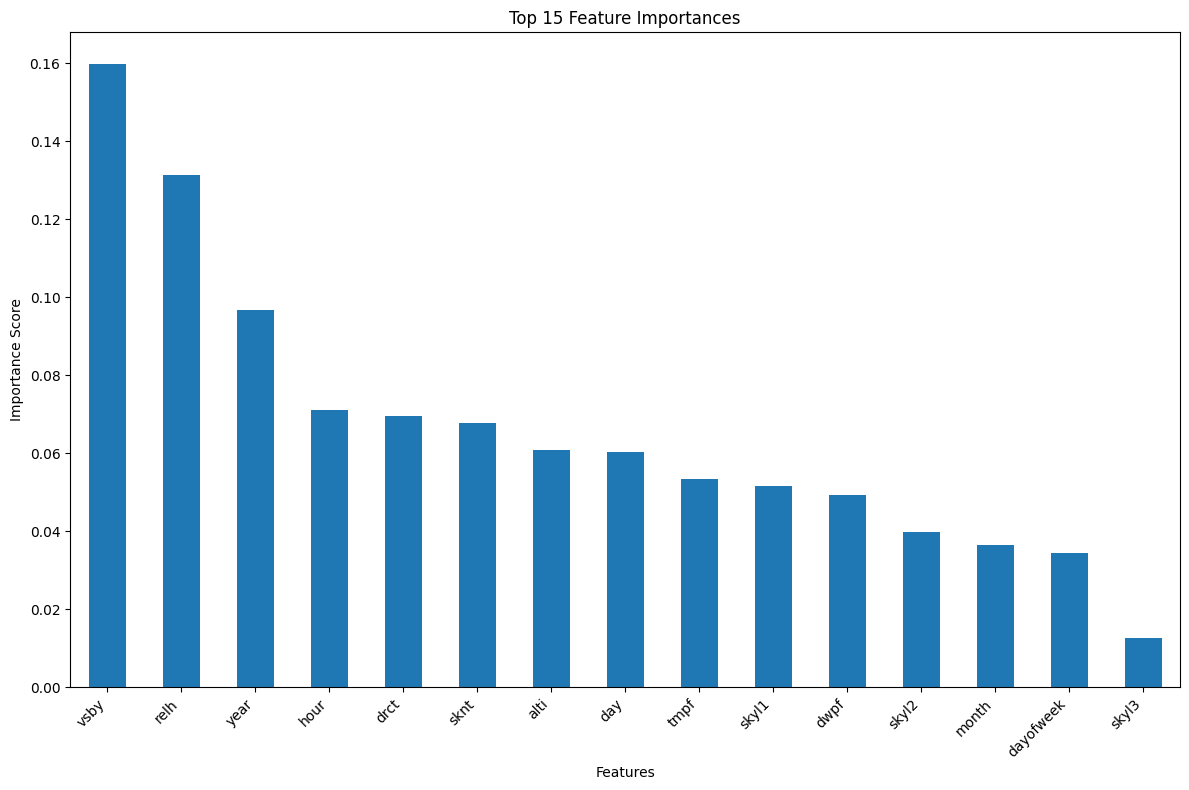

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Access the feature_importances_ attribute of the best_rf_model
feature_importances = best_rf_model.feature_importances_

# Create a pandas Series from the feature importances, using the column names of X_train as the index
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the top 15 most important features
print("\nTop 15 Most Important Features:")
print(sorted_feature_importances.head(15))

# Visualize the top 15 feature importances
plt.figure(figsize=(12, 8))
sorted_feature_importances.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Outlier Removal:** A total of 4,047 rows, representing approximately 1.77% of the original dataset, were removed based on a Z-score threshold of 3 for columns 'sknt', 'gust', 'ice\_accretion\_1hr', 'ice\_accretion\_3hr', 'ice\_accretion\_6hr', and 'peak\_wind\_gust'.
*   **Data Splitting:** The processed data (224,964 rows after outlier removal) was successfully split into training (80%, 662,065 rows) and testing (20%, 165,517 rows) sets.
*   **Initial Model Evaluation:**
    *   Linear Regression: Average Cross-Validation MSE: 1.0112
    *   Gradient Boosting Regressor: Average Cross-Validation MSE: 0.6395
    *   Random Forest Regressor: Average Cross-Validation MSE: 0.6375
*   **Best Initial Model:** The Random Forest Regressor showed the lowest average cross-validation MSE (0.6375) among the evaluated models.
*   **Model Tuning:** Randomized Search Cross-Validation was performed on the Random Forest Regressor. The best parameters found were `{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}`, resulting in a best cross-validation MSE of approximately 0.628.
*   **Final Model Evaluation:** The tuned Random Forest model achieved a Mean Squared Error (MSE) of approximately 0.598 and an R-squared (R2) score of approximately 0.382 on the held-out test set.
*   **Feature Importance:** The top 15 most important features for predicting `p01i` in the tuned Random Forest model were: `vsby`, `relh`, `year`, `hour`, `drct`, `sknt`, `alti`, `day`, `tmpf`, `skyl1`, `dwpf`, `skyl2`, `month`, `dayofweek`, and `skyl3`. Visibility (`vsby`) and relative humidity (`relh`) were the two most important features.

### Insights or Next Steps

*   The tuned Random Forest model provides a reasonable baseline for predicting 'p01i', with visibility and relative humidity being key drivers. Further feature engineering focusing on these variables or interactions could potentially improve performance.
*   Explore alternative regression models or ensemble methods, potentially with more extensive hyperparameter tuning or feature selection techniques, to investigate if a lower MSE and higher R-squared can be achieved.
*   I recognize it is outside the scope for this class, but implimenting a time-series forecast model, like ARIMA, would be beneficial in solving my actual problem statement.


In [49]:
!pip install dash
!pip install dash-bootstrap-components

import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

station_locations = {
    '2P2': {'lat': 42.618, 'lon': -89.04, 'name': 'Southern Wisconsin Regional Airport'},
    'GRB': {'lat': 44.485, 'lon': -88.129, 'name': 'Green Bay Austin Straubel International Airport'},
    'ATW': {'lat': 44.258, 'lon': -88.519, 'name': 'Appleton International Airport'}
}


In [50]:
def create_map_figure():
    fig = go.Figure(go.Scattermapbox(
        lat=[loc['lat'] for loc in station_locations.values()],
        lon=[loc['lon'] for loc in station_locations.values()],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=[loc['name'] for loc in station_locations.values()],
    ))
    fig.update_layout(
        title='Weather Station Locations',
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken='pk.eyJ1IjoiY2hyaWRkeXAiLCJhIjoiY2ozcGI1MTZ3MDBpcTJ3cXR4b3owdDQwaCJ9.a-hP1t-0D2T3Qe3gK2g4_A', # This is a public token for demonstration purposes.
            bearing=0,
            center=dict(
                lat=43.7, # Center latitude for Wisconsin
                lon=-88.5 # Center longitude for Wisconsin
            ),
            pitch=0,
            zoom=6 # Adjust zoom level as needed to show all stations
        ),
    )
    return fig

In [56]:
# Initialize the Dash app
import dash_bootstrap_components as dbc

app_xgb = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the app using Bootstrap components
app_xgb.layout = dbc.Container([
    html.H1("Wisconsin Weather Prediction", className="my-4 text-center"),

    # Removed the Row containing the map, since it stopped pulling in recently, and I can't diagnose why

    dbc.Row([
        dbc.Col(
            dbc.Card([
                dbc.CardHeader(html.H3("Enter Weather Conditions for Prediction")),
                dbc.CardBody([
                    dbc.Label("Temperature (F)"),
                    dbc.Input(id='tmpf-xgb', type='number', value=50, className='mb-3'),
                    dbc.Label("Dew Point (F)"),
                    dbc.Input(id='dwpf-xgb', type='number', value=40, className='mb-3'),
                    dbc.Label("Relative Humidity (%)"),
                    dbc.Input(id='relh-xgb', type='number', value=70, className='mb-3'),
                    dbc.Label("Wind Direction (degrees)"),
                    dbc.Input(id='drct-xgb', type='number', value=180, className='mb-3'),
                    dbc.Label("Wind Speed (knots)"),
                    dbc.Input(id='sknt-xgb', type='number', value=10, className='mb-3'),
                    dbc.Label("Pressure Altimeter (inches)"),
                    dbc.Input(id='alti-xgb', type='number', value=30, className='mb-3'),
                    dbc.Label("Visibility (miles)"),
                    dbc.Input(id='vsby-xgb', type='number', value=10, className='mb-3'),
                    html.Hr(),
                    dbc.Button('Predict Precipitation', id='predict-button-xgb', n_clicks=0, color="primary", className="w-100"),
                    html.Div(id='prediction-output-xgb', className='mt-3 text-center font-weight-bold')
                ])
            ]),
            md=6
        ),
        dbc.Col(
            dbc.Card([
                dbc.CardHeader(html.H3("Historical Data and Current Conditions")),
                dbc.CardBody([
                    dbc.Label("Select Weather Station"),
                    dcc.Dropdown(
                        id='station-dropdown-xgb',
                        options=[{'label': station, 'value': station} for station in station_locations.keys()],
                        value='2P2',
                        className='mb-3'
                    ),
                    html.Div(id='current-conditions-output-xgb', className='mt-3'),
                    dcc.Graph(id='historical-trend-graph-xgb', className='mt-3')
                ])
            ]),
            md=6
        ),
    ], className="mb-4"),

], fluid=True)

@app_xgb.callback(
    Output('prediction-output-xgb', 'children'),
    [Input('predict-button-xgb', 'n_clicks')],
    [
        State('tmpf-xgb', 'value'),
        State('dwpf-xgb', 'value'),
        State('relh-xgb', 'value'),
        State('drct-xgb', 'value'),
        State('sknt-xgb', 'value'),
        State('alti-xgb', 'value'),
        State('vsby-xgb', 'value'),
    ]
)
def update_output__xgb(n_clicks, tmpf, dwpf, relh, drct, sknt, alti, vsby):
    if n_clicks > 0:
        # Create a dictionary of the input features
        features_dict = {
            'tmpf': [tmpf], 'dwpf': [dwpf], 'relh': [relh], 'drct': [drct],
            'sknt': [sknt], 'alti': [alti], 'vsby': [vsby]
        }
        features = pd.DataFrame(features_dict)

        # Add the time-based features with placeholder values (these are not used for prediction based on feature importance)
        features['year'] = 2024
        features['month'] = 7
        features['day'] = 20
        features['hour'] = 12
        features['dayofweek'] = 5 # Saturday


        # Ensure all columns from X_train are present and in the correct order
        # Also handle categorical columns (binned features) by adding them with a default value (e.g., 0)
        # based on the one-hot encoding structure of X_train
        X_train_cols = X_train.columns.tolist()
        for col in X_train_cols:
            if col not in features.columns:
                # Check if the column is a binned categorical column
                if col.startswith('binned_'):
                    features[col] = 0 # Assuming 0 represents the absence of this category
                else:
                    # For other missing numerical columns, use the median from X_train
                    if pd.api.types.is_numeric_dtype(X_train[col]):
                         features[col] = X_train[col].median()
                    else:
                         features[col] = 0 # Default for any unexpected missing column


        # Reindex the features DataFrame to match the column order of X_train
        features = features.reindex(columns=X_train_cols, fill_value=0)

        # Ensure data types match X_train
        for col in X_train_cols:
             if col in features.columns:
                 features[col] = features[col].astype(X_train[col].dtype)


        try:
            prediction = best_rf_model.predict(features)[0]
            return f'Predicted Precipitation (p01i - transformed scale): {prediction:.4f}'
        except Exception as e:
             return f'Prediction Error: {e}'
    return ""

@app_xgb.callback(
    Output('historical-trend-graph-xgb', 'figure'),
    [Input('station-dropdown-xgb', 'value')]
)
def update_historical_trend_xgb(selected_station):
    # Use the original df DataFrame, which contains all the necessary columns before splitting
    station_df = hist_df[hist_df['station'] == selected_station].copy()

    if station_df.empty:
         return go.Figure().update_layout(title=f'No historical data for {selected_station}')

    # Ensure the 'time' column is in datetime format and sort to get the latest
    station_df['time'] = pd.to_datetime(station_df['time'])
    station_df = station_df.sort_values(by='time')


    # Select features for prediction. Ensure these match the features used for training best_rf_model (X_train)
    # This involves applying the same feature engineering steps as applied to the training data
    temp_df = station_df.copy()

    # Extract time-based features
    temp_df['year'] = temp_df['time'].dt.year
    temp_df['month'] = temp_df['time'].dt.month
    temp_df['day'] = temp_df['time'].dt.day
    temp_df['hour'] = temp_df['time'].dt.hour
    temp_df['dayofweek'] = temp_df['time'].dt.dayofweek

    # Create temperature_humidity_category (need tmpf and dwpf)
    def temperature_category_hist(row):
        if pd.isnull(row['tmpf']) or pd.isnull(row['dwpf']):
            return 'Unknown'
        temp_diff = row['tmpf'] - row['dwpf']
        if temp_diff < 5:
            return 'HighHumidity_Warm'
        elif temp_diff >= 5 and row['tmpf'] > 60:
            return 'ModerateHumidity_Warm'
        elif temp_diff >= 5 and row['tmpf'] <= 60:
            return 'ModerateHumidity_Cool'
        elif temp_diff >= 15 and row['tmpf'] > 60:
            return 'LowHumidity_Warm'
        elif temp_diff >= 15 and row['tmpf'] <= 60:
            return 'LowHumidity_Cool'
        else:
            return 'Other'

    temp_df['Temperature_Humidity_Category'] = temp_df.apply(temperature_category_hist, axis=1)


    # Apply Power Transformation to skewed numerical columns
    skewed_cols = ['p01i', 'gust', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
                   'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
                   'peak_wind_gust', 'peak_wind_drct']

    for col in skewed_cols:
        if col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[col]):
             # Apply the same transformation fitted on the training data
            try:
                # Need to ensure the transformer 'pt' is accessible here or refit
                # For simplicity and assuming 'pt' is available in the global scope from previous execution
                # A more robust solution would be to save/load the fitted transformer
                if 'pt' in globals():
                    data_to_transform = temp_df[col].values.reshape(-1, 1)
                    temp_df[col] = pt.transform(data_to_transform)
                else:
                    print(f"Warning: PowerTransformer 'pt' not found, skipping transformation for '{col}'.")
            except Exception as e:
                 print(f"Error transforming column '{col}': {e}")
        else:
            print(f"Column '{col}' not found or not numerical in historical data, skipping transformation.")

    # Bin the top 5 correlated columns (need relh, dwpf, peak_wind_gust, tmpf, sknt)
    # This part needs to be carefully reconstructed based on the original binning logic
    top_5_corr_cols = ['relh', 'dwpf', 'peak_wind_gust', 'tmpf', 'sknt'] # Based on previous EDA

    for col in top_5_corr_cols:
        if col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[col]):
            try:
                 # This requires the original bin edges or quantile information from the training data
                 # Since those are not saved, we might need to simplify or regenerate
                 # For a direct application, we would need to save and load the binning logic
                 # As a workaround for demonstration, we might skip binning or use a simpler approach if the original binning was complex (e.g., qcut)
                 # Given the error "Could not bin column 'peak_wind_gust': Bin labels must be one fewer than the number of bin edges" previously,
                 # using pd.cut with auto bins might be more reliable for plotting purposes, but might not exactly match training data features
                 # A better approach for consistent features is to apply the *exact* same binning logic with saved parameters.
                 # For now, let's attempt to replicate the qcut based on the historical data itself (less ideal for consistent features but might resolve the error)
                 try:
                     temp_df[f'binned_{col}'] = pd.qcut(temp_df[col], q=5, labels=['very low', 'low', 'med', 'high', 'very high'], duplicates='drop')
                 except ValueError as e:
                     print(f"Could not bin column '{col}' in historical data with qcut: {e}")
                     try:
                         temp_df[f'binned_{col}'] = pd.cut(temp_df[col], bins=5, labels=['very low', 'low', 'med', 'high', 'very high'], include_lowest=True)
                     except ValueError as e_cut:
                          print(f"Could not bin column '{col}' in historical data with cut: {e_cut}")
                          temp_df[f'binned_{col}'] = 'Binning Failed' # Assign a placeholder

                 # Rename labels with column name prefix
                 temp_df[f'binned_{col}'] = temp_df[f'binned_{col}'].apply(lambda x: f'{x}_{col}' if pd.notnull(x) and x != 'Binning Failed' else x)

            except Exception as e:
                print(f"Error binning column '{col}' in historical data: {e}")
        else:
            print(f"Column '{col}' not found or not numerical in historical data, skipping binning.")


    # Identify categorical columns to encode (excluding 'Source', 'station', 'time', 'metar', 'peak_wind_time')
    categorical_cols_hist = temp_df.select_dtypes(include='object').columns.tolist()
    cols_to_encode_hist = [col for col in categorical_cols_hist if col not in ['Source', 'station', 'time', 'metar', 'peak_wind_time']]


    # Apply one-hot encoding to the categorical columns
    temp_df_encoded = pd.get_dummies(temp_df, columns=cols_to_encode_hist, drop_first=True)


    # Ensure the columns match those of X_train before prediction
    X_train_cols = X_train.columns.tolist()
    X_station = temp_df_encoded.reindex(columns=X_train_cols, fill_value=0)


    # Ensure data types match X_train
    for col in X_train_cols:
         if col in X_station.columns:
             X_station[col] = X_station[col].astype(X_train[col].dtype)


    try:
        # Predict using the best_rf_model
        temp_df['predicted_p01i'] = best_rf_model.predict(X_station)

        # Plot the historical trend of predicted precipitation
        fig = px.line(temp_df, x='time', y='predicted_p01i', title=f'Historical Predicted Precipitation for {selected_station}')
        return fig
    except Exception as e:
         print(f"Error during historical trend prediction for {selected_station}: {e}")
         return go.Figure().update_layout(title=f'Error loading historical data for {selected_station}')


@app_xgb.callback(
    Output('current-conditions-output-xgb', 'children'),
    [Input('station-dropdown-xgb', 'value')]
)
def update_current_conditions_xgb(selected_station):
    # Use the original hist_df DataFrame to get the latest conditions
    station_df = hist_df[hist_df['station'] == selected_station].copy()

    if not station_df.empty:
        # Ensure the 'time' column is in datetime format and sort to get the latest
        station_df['time'] = pd.to_datetime(station_df['time'])
        station_df = station_df.sort_values(by='time', ascending=False)

        latest_conditions = station_df.iloc[0]
        return html.Div([
            html.H4(f"Current Conditions at {selected_station}"),
            html.P(f"Time: {latest_conditions['time']}"),
            html.P(f"Temperature: {latest_conditions['tmpf']:.2f}°F"),
            html.P(f"Dew Point: {latest_conditions['dwpf']:.2f}°F"),
            html.P(f"Relative Humidity: {latest_conditions['relh']:.2f}%"),
            html.P(f"Wind: {latest_conditions['drct']}° at {latest_conditions['sknt']} knots"),
            html.P(f"Visibility: {latest_conditions['vsby']:.2f} miles")
        ])
    return "No data available for this station."


if __name__ == '__main__':
    app_xgb.run(debug=True)

<IPython.core.display.Javascript object>

***Wisconsin Weather Precipitation Prediction Application***
**Application Overview:**
This application predicts hourly precipitation using Wisconsin weather station data from three locations (Southern Wisconsin Regional Airport, Green Bay Austin Straubel International Airport, and Appleton International Airport). The system combines historical weather observations with machine learning to forecast precipitation amounts, providing both real-time predictions and historical trend analysis through an interactive dashboard.

**Model Selection Rationale:**
I chose Random Forest Regressor as the primary model after evaluating multiple algorithms including Linear Regression, Gradient Boosting, and Random Forest. The Random Forest achieved the lowest cross-validation MSE (0.6375) and demonstrated superior performance in handling the complex, non-linear relationships inherent in weather data. Random Forest's ability to capture feature interactions, handle missing values robustly, and provide feature importance rankings made it ideal for this meteorological prediction task. The model was further optimized through RandomizedSearchCV, achieving a final test MSE of 0.598 with an R² of 0.382.

**Project Methodology:**
I followed a comprehensive data science methodology beginning with extensive data cleaning and exploratory data analysis of over 200,000 weather observations. The process included handling missing values through median/mode imputation, feature engineering (creating time-based features and temperature-humidity categories), and addressing multicollinearity by removing highly correlated features. I applied Yeo-Johnson transformations to skewed variables, removed outliers using Z-score thresholds, and performed systematic model evaluation with cross-validation. The final model was deployed in an interactive Dash application with real-time prediction capabilities and historical trend visualization.

**Operational Next Steps:**
To make this a production-ready application, I would implement real-time data ingestion from weather APIs, establish automated model retraining pipelines to handle concept drift, and deploy the system on cloud infrastructure with proper monitoring and alerting. Additional enhancements would include ensemble methods combining multiple models, time-series forecasting capabilities using ARIMA or LSTM models, and expanded geographic coverage. The application would benefit from A/B testing frameworks, comprehensive logging systems, and integration with existing weather service platforms.

**Key Learnings and Questions:**
The analysis revealed that visibility and relative humidity are the strongest predictors of precipitation, which aligns with meteorological principles. However, the model's performance suggests that weather prediction remains inherently challenging due to chaotic system dynamics. I learned that feature engineering, particularly creating meaningful categorical variables from continuous weather measurements, significantly impacts model performance. Outstanding questions include whether classification approaches might be more suitable given the bimodal distribution of precipitation data, how to better incorporate temporal dependencies, and whether additional atmospheric variables (pressure trends, upper-level data) would improve predictions. The residual analysis revealed systematic patterns suggesting the model could benefit from more sophisticated approaches to capture the underlying weather dynamics.